In [17]:
#%matplotlib notebook
import scipy.stats
import numpy as np

import matplotlib
import torch

%matplotlib inline
%load_ext autoreload
%autoreload 2

#%env PYTORCH_TRANSFORMERS_CACHE="/mnt/nfs/work1/mccallum/hschang/pytorch_cache"

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs"

result_file_1 = "../gen_log/single_facet_top5_to_1_recon_err_both_norm_emb_eigs"
result_file_2 = "../gen_log/multi_facet_top5_to_1_recon_err_both_norm_emb_eigs"



def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 12
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list)

label_idx_s5, top_k_idx_s5, top_k_prob_list_s5, loss_s5, reconstruction_err_s5, reconstruction_norm_err_s5, top_k_div_s5, top_k_div_norm_s5, pred_div_s5, target_norm_s5, top_k_mag_s5, top_entropy_s5, eig_vals_min_s5, eig_vals_prod_s5 = load_result_file(result_file_1)
label_idx_m5, top_k_idx_m5, top_k_prob_list_m5, loss_m5, reconstruction_err_m5, reconstruction_norm_err_m5, top_k_div_m5, top_k_div_norm_m5, pred_div_m5, target_norm_m5, top_k_mag_m5, top_entropy_m5, eig_vals_min_m5, eig_vals_prod_m5 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


In [8]:
#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err"
#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err"

#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err_not_norm_emb_more"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err_not_norm_emb_more"

#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_new"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs_new"



#result_file_1 = "../gen_log/single_facet_top20_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_top20_to_1_recon_err_both_norm_emb_eigs"

#result_file_1 = "../gen_log/single_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"
result_file_2 = "../gen_log/multi_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"



def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 14
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list)

label_idx_1, top_k_idx_1, top_k_prob_list_1, loss_1, reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, target_norm_1, top_k_mag_1, top_entropy_1, eig_vals_min_1, eig_vals_prod_1, eig_vals_min_norm_1, eig_vals_prod_norm_1 = load_result_file(result_file_1)
#label_idx_2, top_k_idx_2, top_k_prob_list_2, loss_2, reconstruction_err_2, reconstruction_norm_err_2, top_k_div_2, top_k_div_norm_2, pred_div_2, target_norm_2, top_k_mag_2, top_entropy_2, eig_vals_min_2, eig_vals_prod_2, eig_vals_min_norm_2, eig_vals_prod_norm_2 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))

In [126]:
print(len(label_idx_1))
print(len(label_idx_2))
#print(tokenizer_GPT2.decode(label_idx_1[:1200]))
#print(tokenizer_GPT2.decode(label_idx_2[:1200]))
#print(label_idx_1[int(len(label_idx_2)/10)-10:int(len(label_idx_2)/10)])
#print(label_idx_2[int(len(label_idx_2)/10)-10:int(len(label_idx_2)/10)])

1020000
1020000


In [3]:
#result_file_1 = "../gen_log/multi_facet_no_partition_top10_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs_new2"

#result_file_1 = "../gen_log/single_facet_top20_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_top20_to_1_recon_err_both_norm_emb_eigs"

#result_file_1 = "../gen_log/single_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"

result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_bptt196"
#result_file_2 = "../gen_log/single_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"
result_file_2 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_bptt196_LM_new"

#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_new2"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs_new2"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 15
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list)

label_idx_1, top_k_idx_1, top_k_prob_list_1, loss_1, reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, pred_div_sq_weight_1, target_norm_1, top_k_mag_1, top_entropy_1, eig_vals_min_1, eig_vals_prod_1, eig_vals_min_norm_1, eig_vals_prod_norm_1 = load_result_file(result_file_1)
label_idx_2, top_k_idx_2, top_k_prob_list_2, loss_2, reconstruction_err_2, reconstruction_norm_err_2, top_k_div_2, top_k_div_norm_2, pred_div_2, pred_div_sq_weight_2, target_norm_2, top_k_mag_2, top_entropy_2, eig_vals_min_2, eig_vals_prod_2, eig_vals_min_norm_2, eig_vals_prod_norm_2 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


In [4]:
#result_file_1 = "../gen_log/multi_facet_no_partition_top10_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs_new2"

#result_file_1 = "../gen_log/single_facet_top20_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_top20_to_1_recon_err_both_norm_emb_eigs"

#result_file_1 = "../gen_log/single_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/multi_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"

#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_bptt196"
#result_file_2 = "../gen_log/single_facet_medium_top10_to_1_recon_err_both_norm_emb_eigs"
#result_file_2 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_bptt196_LM_new"

result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_new2"
result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs_new2"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 15
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list)

label_idx_s, top_k_idx_s, top_k_prob_list_s, loss_s, reconstruction_err_s, reconstruction_norm_err_s, top_k_div_s, top_k_div_norm_s, pred_div_s, pred_div_sq_weight_s, target_norm_s, top_k_mag_s, top_entropy_s, eig_vals_min_s, eig_vals_prod_s, eig_vals_min_norm_s, eig_vals_prod_norm_s = load_result_file(result_file_1)
label_idx_m, top_k_idx_m, top_k_prob_list_m, loss_m, reconstruction_err_m, reconstruction_norm_err_m, top_k_div_m, top_k_div_norm_m, pred_div_m, pred_div_sq_weight_m, target_norm_m, top_k_mag_m, top_entropy_m, eig_vals_min_m, eig_vals_prod_m, eig_vals_min_norm_m, eig_vals_prod_norm_m = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


In [27]:
#result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_bptt196_small"
#result_file_2 = "../gen_log/multi_facet_no_partition_top10_eigs_collapse_diff_bptt196_small"

result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_bptt196"
result_file_2 = "../gen_log/multi_facet_no_partition_top10_eigs_collapse_diff_bptt196_norm"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 17
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm, collapse_diff, facet_norm = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm), float(collapse_diff), float(facet_norm)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list, collapse_diff_list, facet_norm_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list), np.array(collapse_diff_list), np.array(facet_norm_list)

label_idx_sc, top_k_idx_sc, top_k_prob_list_sc, loss_sc, reconstruction_err_sc, reconstruction_norm_err_sc, top_k_div_sc, top_k_div_norm_sc, pred_div_sc, pred_div_sq_weight_sc, target_norm_sc, top_k_mag_sc, top_entropy_sc, eig_vals_min_sc, eig_vals_prod_sc, eig_vals_min_norm_sc, eig_vals_prod_norm_sc, collapse_diff_sc, facet_norm_sc = load_result_file(result_file_1)
label_idx_mc, top_k_idx_mc, top_k_prob_list_mc, loss_mc, reconstruction_err_mc, reconstruction_norm_err_mc, top_k_div_mc, top_k_div_norm_mc, pred_div_mc, pred_div_sq_weight_mc, target_norm_mc, top_k_mag_mc, top_entropy_mc, eig_vals_min_mc, eig_vals_prod_mc, eig_vals_min_norm_mc, eig_vals_prod_norm_mc, collapse_diff_mc, facet_norm_mc = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


In [67]:
#result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_bptt196_small"
#result_file_2 = "../gen_log/multi_facet_no_partition_top10_eigs_collapse_diff_bptt196_small"

#result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_bptt196"
#result_file_2 = "../gen_log/multi_facet_no_partition_top10_eigs_collapse_diff_bptt196_norm"

result_file_1 = "../gen_log/single_facet_medium_top10_to_emb_eigs_norm"
result_file_2 = "../gen_log/multi_facet_medium_top10__emb_eigs_norm"

label_idx_slc, top_k_idx_slc, top_k_prob_list_slc, loss_slc, reconstruction_err_slc, reconstruction_norm_err_slc, top_k_div_slc, top_k_div_norm_slc, pred_div_slc, pred_div_sq_weight_slc, target_norm_slc, top_k_mag_slc, top_entropy_slc, eig_vals_min_slc, eig_vals_prod_slc, eig_vals_min_norm_slc, eig_vals_prod_norm_slc, collapse_diff_slc, facet_norm_slc = load_result_file(result_file_1)
label_idx_mlc, top_k_idx_mlc, top_k_prob_list_mlc, loss_mlc, reconstruction_err_mlc, reconstruction_norm_err_mlc, top_k_div_mlc, top_k_div_norm_mlc, pred_div_mlc, pred_div_sq_weight_mlc, target_norm_mlc, top_k_mag_mlc, top_entropy_mlc, eig_vals_min_mlc, eig_vals_prod_mlc, eig_vals_min_norm_mlc, eig_vals_prod_norm_mlc, collapse_diff_mlc, facet_norm_mlc = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


In [93]:
result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_bptt196_LM_norm"
result_file_2 = "../gen_log/multi_facet_top10_eigs_collapse_diff_bptt196_norm"

label_idx_sfc, top_k_idx_sfc, top_k_prob_list_sfc, loss_sfc, reconstruction_err_sfc, reconstruction_norm_err_sfc, top_k_div_sfc, top_k_div_norm_sfc, pred_div_sfc, pred_div_sq_weight_sfc, target_norm_sfc, top_k_mag_sfc, top_entropy_sfc, eig_vals_min_sfc, eig_vals_prod_sfc, eig_vals_min_norm_sfc, eig_vals_prod_norm_sfc, collapse_diff_sfc, facet_norm_sfc = load_result_file(result_file_1)
label_idx_mpc, top_k_idx_mpc, top_k_prob_list_mpc, loss_mpc, reconstruction_err_mpc, reconstruction_norm_err_mpc, top_k_div_mpc, top_k_div_norm_mpc, pred_div_mpc, pred_div_sq_weight_mpc, target_norm_mpc, top_k_mag_mpc, top_entropy_mpc, eig_vals_min_mpc, eig_vals_prod_mpc, eig_vals_min_norm_mpc, eig_vals_prod_norm_mpc, collapse_diff_mpc, facet_norm_mpc = load_result_file(result_file_2)


In [203]:
result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_inv_bptt196_norm"
result_file_2 = "../gen_log/multi_facet_top10_eigs_collapse_diff_inv_bptt196_norm"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 20
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm, collapse_diff, collapse_diff_inv, collapse_diff_val, facet_norm, top_four_dist = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm), float(collapse_diff), float(collapse_diff_inv), float(collapse_diff_val), float(facet_norm), float(top_four_dist)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list, collapse_diff_list, collapse_diff_inv_list, collapse_diff_val_list, facet_norm_list, top_four_dist_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list), np.array(collapse_diff_list), np.array(collapse_diff_inv_list), np.array(collapse_diff_val_list), np.array(facet_norm_list), np.array(top_four_dist_list)

label_idx_si, top_k_idx_si, top_k_prob_list_si, loss_si, reconstruction_err_si, reconstruction_norm_err_si, top_k_div_si, top_k_div_norm_si, pred_div_si, pred_div_sq_weight_si, target_norm_si, top_k_mag_si, top_entropy_si, eig_vals_min_si, eig_vals_prod_si, eig_vals_min_norm_si, eig_vals_prod_norm_si, collapse_diff_si, collapse_diff_inv_si, collapse_diff_val_si, facet_norm_si, top_four_dist_si = load_result_file(result_file_1)
#label_idx_mi, top_k_idx_mi, top_k_prob_list_mi, loss_mi, reconstruction_err_mi, reconstruction_norm_err_mi, top_k_div_mi, top_k_div_norm_mi, pred_div_mi, pred_div_sq_weight_mi, target_norm_mi, top_k_mag_mi, top_entropy_mi, eig_vals_min_mi, eig_vals_prod_mi, eig_vals_min_norm_mi, eig_vals_prod_norm_mi, collapse_diff_mi, collapse_diff_inv_mi, collapse_diff_val_mi, facet_norm_mi, top_four_dist_mi = load_result_file(result_file_2)


In [241]:
#result_file_1 = "../gen_log/single_facet_top10_eigs_collapse_diff_inv_bptt196_norm"
#result_file_2 = "../gen_log/multi_facet_top10_eigs_collapse_diff_vis_bptt196_norm"

result_file_1 = "../gen_log/single_facet_top20_eigs_collapse_diff_inv_bptt196_norm"
result_file_2 = "../gen_log/multi_facet_top20_eigs_collapse_diff_vis_bptt196_norm"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    top_k_prob_single_list = []
    top_k_idx_single_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 20
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm, collapse_diff, collapse_diff_inv, collapse_diff_val, facet_norm, top_four_dist = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/4)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:recording_num+2*top_k_num])
            top_k_idx_single_list.append(fields[recording_num+2*top_k_num:recording_num+3*top_k_num])
            top_k_prob_single_list.append(fields[recording_num+3*top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm), float(collapse_diff), float(collapse_diff_inv), float(collapse_diff_val), float(facet_norm), float(top_four_dist)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list, collapse_diff_list, collapse_diff_inv_list, collapse_diff_val_list, facet_norm_list, top_four_dist_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, top_k_idx_single_list, top_k_prob_single_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list), np.array(collapse_diff_list), np.array(collapse_diff_inv_list), np.array(collapse_diff_val_list), np.array(facet_norm_list), np.array(top_four_dist_list)

label_idx_si2, top_k_idx_si2, top_k_prob_list_si2, top_k_idx_single_si2, top_k_prob_list_single_si2, loss_si2, reconstruction_err_si2, reconstruction_norm_err_si2, top_k_div_si2, top_k_div_norm_si2, pred_div_si2, pred_div_sq_weight_si2, target_norm_si2, top_k_mag_si2, top_entropy_si2, eig_vals_min_si2, eig_vals_prod_si2, eig_vals_min_norm_si2, eig_vals_prod_norm_si2, collapse_diff_si2, collapse_diff_inv_si2, collapse_diff_val_si2, facet_norm_si2, top_four_dist_si2 = load_result_file(result_file_1)
#label_idx_mi2, top_k_idx_mi2, top_k_prob_list_mi2, top_k_idx_single_mi2, top_k_prob_list_single_mi2, loss_mi2, reconstruction_err_mi2, reconstruction_norm_err_mi2, top_k_div_mi2, top_k_div_norm_mi2, pred_div_mi2, pred_div_sq_weight_mi2, target_norm_mi2, top_k_mag_mi2, top_entropy_mi2, eig_vals_min_mi2, eig_vals_prod_mi2, eig_vals_min_norm_mi2, eig_vals_prod_norm_mi2, collapse_diff_mi2, collapse_diff_inv_mi2, collapse_diff_val_mi2, facet_norm_mi2, top_four_dist_mi2 = load_result_file(result_file_2)


In [242]:
print(len(top_k_div_norm_si2), len(loss_si2))
#print(top_k_div_norm_si2)

780000 780000


In [83]:
print(label_idx_sc[-10:])
print(label_idx_slc[-10:])

(278, 11, 673, 17567, 465, 2897, 11, 290, 318, 788)
(278, 11, 673, 17567, 465, 2897, 11, 290, 318, 788)


In [115]:
print(np.mean(loss_1-loss_2))


0.022792293332114424


In [97]:
print(facet_norm_sc[:10])
print(collapse_diff_mc[:10])

[16.17617035 20.82407951 22.19204521 29.65284348 23.3591156  24.67861938
 23.17146301 24.69543648 24.41123009 22.18644333]
[0.30937004 0.38081583 0.76187265 0.44831866 0.80023348 0.39770475
 0.49635082 0.99080557 0.98328316 0.99827379]


In [28]:
#X = np.stack((reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, top_entropy_1, target_norm_1, top_k_mag_1, eig_vals_min_1, eig_vals_prod_1, eig_vals_min_norm_1, eig_vals_prod_norm_1),axis=-1)
#X = np.stack((reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, target_norm_1*target_norm_1, top_k_mag_1*top_k_mag_1),axis=-1)
X = np.stack((reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, target_norm_1, top_k_mag_1, eig_vals_min_1, eig_vals_prod_1, eig_vals_min_norm_1, eig_vals_prod_norm_1),axis=-1)
Y = loss_1 - loss_2
Pos_mask = Y > 0
X = X[Pos_mask]
Y = Y[Pos_mask]
X_train=X[::5,:]
X_test=X[1::5,:]
Y_train=Y[::5]
Y_test=Y[1::5]
print(X_train.shape)


(79446, 11)


In [29]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10, max_depth=2)
regr.fit(X_train, Y_train)
print(regr.feature_importances_)

[0.         0.37466274 0.31700728 0.13504179 0.         0.01958148
 0.15370672 0.         0.         0.         0.        ]


In [30]:
from sklearn.linear_model import Ridge
regr = RandomForestRegressor(n_estimators=10, max_depth=3)
#regr = Ridge()
X = reconstruction_norm_err_1[Pos_mask]
regr.fit(X[::5].reshape(-1,1), Y_train)
regr.score(X[1::5].reshape(-1,1), Y_test)

0.023057144693717113

In [31]:
regr = RandomForestRegressor(n_estimators=10, max_depth=3)
X = eig_vals_prod_1[Pos_mask]
regr.fit(X[::5].reshape(-1,1), Y_train)
regr.score(X[1::5].reshape(-1,1), Y_test)

0.029388366915623524

In [128]:
regr = RandomForestRegressor(n_estimators=10, max_depth=3)
X = top_k_div_norm_1[Pos_mask]
regr.fit(X[::5].reshape(-1,1), Y_train)
regr.score(X[1::5].reshape(-1,1), Y_test)

0.034205872192120235

In [129]:
regr = RandomForestRegressor(n_estimators=10, max_depth=3)
X = top_entropy_1[Pos_mask]
regr.fit(X[::5].reshape(-1,1), Y_train)
regr.score(X[1::5].reshape(-1,1), Y_test)

0.03896930920460995

In [115]:
print(regr.score(X_train, Y_train))
print(regr.score(X_test, Y_test))

0.03484533059170358
0.03623629628229563


In [4]:
from gpt2_model.tokenization_gpt2 import GPT2Tokenizer

tokenizer_GPT2 = GPT2Tokenizer.from_pretrained('gpt2')


stop_word_file = '../resources/stop_word_list'

def convert_stop_to_ind(f_in):
    stop_word_set = set()
    for line in f_in:
        w = line.rstrip()
        stop_word_set.add('ġ'+w)
    return stop_word_set

with open(stop_word_file) as f_in:
    stop_word_set = convert_stop_to_ind(f_in)
#print(stop_word_set)

vocab_map = dict(tokenizer_GPT2.encoder, **tokenizer_GPT2.added_tokens_encoder)
vocab_size = len(vocab_map)
idxl2token = ['']*vocab_size
non_stop_idx_set = set()
for w in vocab_map:
    idx = vocab_map[w]
    idxl2token[idx] = w
    if w.lower() not in stop_word_set:
        non_stop_idx_set.add(idx)

#print(idxl2token)
        
        
stop_idx_1 = []
non_stop_idx_1 = []
for i in range(len(label_idx_1)):
    if label_idx_1[i] in non_stop_idx_set:
        non_stop_idx_1.append(i)
    else:
        stop_idx_1.append(i)

print(len(stop_idx_1))
print(len(non_stop_idx_1))

NameError: name 'label_idx_1' is not defined

In [46]:
stop_idx_s = []
non_stop_idx_s = []
for i in range(len(label_idx_s)):
    if label_idx_s[i] in non_stop_idx_set:
        non_stop_idx_s.append(i)
    else:
        stop_idx_s.append(i)

print(len(stop_idx_s))
print(len(non_stop_idx_s))

281328
738672


In [57]:
low_re_high_norm = []
for i in range(len(label_idx_1)):
    if reconstruction_err_1[i] < 4 and target_norm_1[i] > 4:
        low_re_high_norm.append(i)

high_re_low_norm = []
for i in range(len(label_idx_1)):
    if reconstruction_err_1[i] > 4 and target_norm_1[i] < 4:
        high_re_low_norm.append(i)


In [17]:
def vis_extreme(loss_diff):
    sorted_idx = np.argsort(-loss_diff)

    top_example_num = min(30,loss_diff.size)
    show_text_win_size = 10

    for i in range(top_example_num):
        idx = sorted_idx[i]
        print(loss_diff[idx])
        print(loss_1[idx])
        print(loss_2[idx])
        print(reconstruction_err_1[idx])
        print(target_norm_1[idx])
        print(top_k_div_norm_1[idx])
        print(tokenizer_GPT2.decode(label_idx_1[idx-show_text_win_size:idx]))
        print(tokenizer_GPT2.decode(label_idx_1[idx:idx+show_text_win_size]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_1[idx],top_k_prob_list_1[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_2[idx],top_k_prob_list_2[idx])]))
        #print('|'.join([idxl2token[int(x)] for x in top_k_idx_2[idx]]))

loss_diff = loss_1 - loss_2
vis_extreme(loss_diff)
#vis_extreme(pred_div_sq_weight_2)
#vis_extreme(reconstruction_norm_err_1)

8.256525039672852
14.041364669799805
5.784839630126953
3.9012765884399414
3.2790262699127197
0.7886822819709778
37, p.41 (digitized by the
 BabeÈ-Bolyai University
ĠState 0.18859775364398956|ĠRomanian 0.10596383363008499|Ġpublisher 0.08214843273162842|Ġhistorian 0.06169497221708298|ĠUniversity 0.06160774454474449|ĠInternet 0.04508422687649727|ĠNational 0.0381532721221447|ĠLibrary 0.033697400242090225|Ġauthor 0.025623666122555733|Ġ 0.018837662413716316
ĠState 0.10383160412311554|ĠRomanian 0.1026831790804863|ĠR 0.08163503557443619|Ġauthor 0.07878771424293518|ĠNational 0.06143239513039589|Ġpublisher 0.05232040211558342|ĠInstitute 0.030219824984669685|Ġarchive 0.016054749488830566|Ġ. 0.01570799946784973|ĠUniversity 0.014054312370717525
7.722054958343506
9.339848518371582
1.6177935600280762
5.605552673339844
4.003558158874512
0.8112691044807434
 confrontation with Wallachian leader Tudor Vladim
irescu, taking an active part in the latter
iro 0.8932342529296875|Ãĥ 0.08452159911394119|ir 0.0

In [214]:
def vis_extreme(loss_diff, mask):
    sorted_idx = np.argsort(-loss_diff)
    mask_idx = set(np.where(mask)[0].tolist())
    #print(mask_idx)
    top_example_num = min(30,loss_diff.size)
    show_text_win_size = 30

    count = 0
    for i in range(len(sorted_idx)):#top_example_num):
        idx = sorted_idx[i]
        if idx not in mask_idx:
            continue
        count += 1
        if count > top_example_num:
            break
        print(loss_diff[idx])
        print(loss_sc[idx])
        print(loss_mc[idx])
        print(reconstruction_err_sc[idx])
        print(target_norm_sc[idx])
        print(top_k_div_norm_sc[idx])
        print(facet_norm_sc[idx])
        print(collapse_diff_mc[idx])
        print(pred_div_sq_weight_mc[idx])
        print(tokenizer_GPT2.decode(label_idx_sc[idx-show_text_win_size:idx]))
        print(tokenizer_GPT2.decode(label_idx_sc[idx:idx+show_text_win_size]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_sc[idx],top_k_prob_list_sc[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_mi[idx],top_k_prob_list_mi[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_single_mi[idx],top_k_prob_list_single_mi[idx])]))
        #print('|'.join([idxl2token[int(x)] for x in top_k_idx_2[idx]]))
        

#loss_diff = loss_1 - loss_2
#loss_diff = top_k_div_norm_sc/collapse_diff_mc
loss_diff = loss_sc - loss_mc
#loss_diff = -eig_vals_min_norm_mc/top_k_div_norm_mc*collapse_diff_mc
#loss_diff = -top_four_dist_mi
#mask = collapse_diff_mc > 0
#mask = eig_vals_min_norm_sc/top_k_div_norm_sc < 0.3
mask = collapse_diff_mc < 0.8
#mask = top_four_dist_mi < 0.3
vis_extreme(loss_diff, mask)

3.9777441024780273
8.459726333618164
4.481982231140137
5.919308662414551
4.384726524353027
0.799893319606781
34.437259674072266
0.7709333896636963
0.04965776205062866
  For almost a year before, he and Oltul had taken an active part in the campaign against Conservative Party and its leader, Premier Lasc
Är Catargiu. In this context, he had demanded that the common man  rise up with weapons in their hands and break
aris 0.4772135615348816|aux 0.1741555631160736|hen 0.017657775431871414|us 0.016574261710047722|ari 0.014712573029100895|ak 0.013009910471737385|ia 0.011887133121490479|aud 0.010830188170075417|au 0.010213620960712433|ais 0.00956951268017292
aris 0.5093314051628113|aux 0.26846933364868164|oc 0.009385683573782444|hen 0.009037936106324196|ais 0.00863152276724577|ia 0.008409545756876469|u 0.007408050820231438|ar 0.0072588929906487465|ov 0.007182103581726551|us 0.0052690450102090836
aux 3.559890319593251e-05|aris 3.4521330235293135e-05|ia 3.1798521376913413e-05|us 3.160435153404

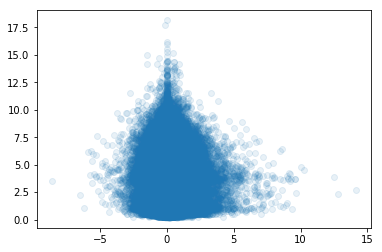

In [49]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, reconstruction_err_1, alpha = 0.1)
#fig = plt.figure()
#plt.scatter(loss_1[stop_idx] - loss_2[stop_idx], reconstruction_err_2[stop_idx])
#fig = plt.figure()
#plt.scatter(loss_1[non_stop_idx] - loss_2[non_stop_idx], reconstruction_err_2[non_stop_idx])

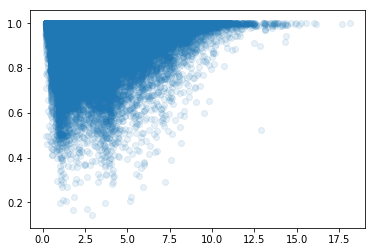

In [152]:
plt.scatter(reconstruction_err_sc, collapse_diff_mc, alpha = 0.1)

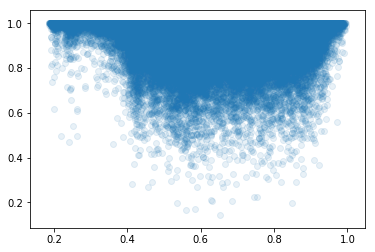

In [159]:
plt.scatter(eig_vals_min_norm_sc/top_k_div_norm_sc, collapse_diff_mc, alpha = 0.1)

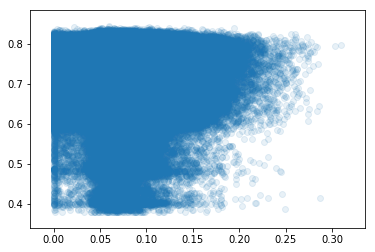

In [43]:
plt.scatter(pred_div_sq_weight_mc, top_k_div_norm_sc, alpha = 0.1)

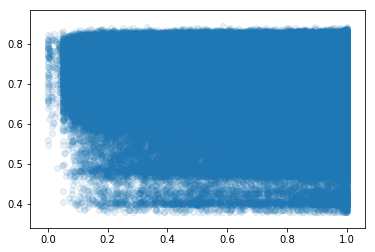

In [174]:
plt.scatter(collapse_diff_val_mi, top_k_div_norm_sc, alpha = 0.1)

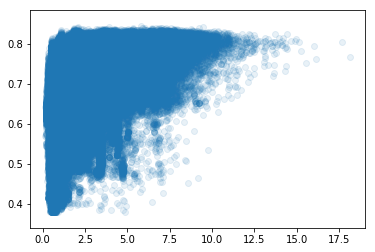

In [141]:
plt.scatter(reconstruction_err_sc, top_k_div_norm_sc, alpha = 0.1)

In [ ]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_min_1, alpha = 0.1)
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_prod_1, alpha = 0.1)

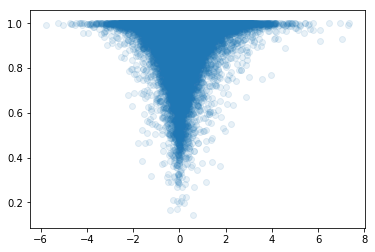

In [77]:
#fig = plt.figure()
#plt.scatter(loss_sc - loss_mc, facet_norm_sc, alpha = 0.1)
fig = plt.figure()
#plt.scatter(loss_sc - loss_mc, collapse_diff_mc, alpha = 0.1)
#mask = top_k_div_norm_sc > 0.8
mask = top_k_div_norm_sc > 0
plt.scatter(loss_sc[mask] - loss_mc[mask], collapse_diff_mc[mask], alpha = 0.1)


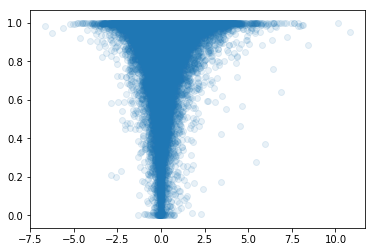

In [94]:
#fig = plt.figure()
#plt.scatter(loss_sc - loss_mc, facet_norm_sc, alpha = 0.1)
fig = plt.figure()
#plt.scatter(loss_sc - loss_mc, collapse_diff_mc, alpha = 0.1)
#mask = top_k_div_norm_sc > 0.8
mask = top_k_div_norm_sc > 0
plt.scatter(loss_sc[mask] - loss_mpc[mask], collapse_diff_mpc[mask], alpha = 0.1)


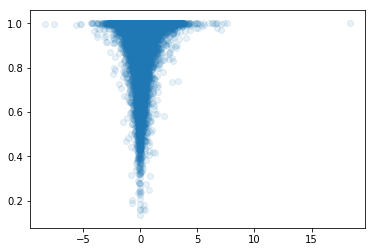

In [78]:
fig = plt.figure()
mask = top_k_div_norm_slc > 0
plt.scatter(loss_slc[mask] - loss_mlc[mask], collapse_diff_mlc[mask], alpha = 0.1)


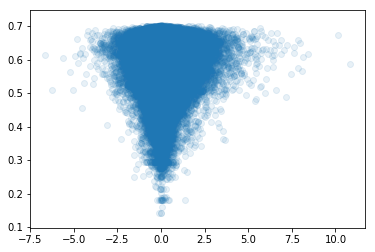

In [204]:
fig = plt.figure()
mask = top_k_div_norm_sc > 0
plt.scatter(loss_sc[mask] - loss_mi[mask], top_four_dist_si[mask], alpha = 0.1)

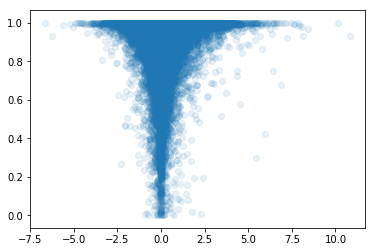

In [230]:
fig = plt.figure()
mask = top_k_div_norm_sc > 0
plt.scatter(loss_sc[mask] - loss_mi2[mask], collapse_diff_mi2[mask], alpha = 0.1)


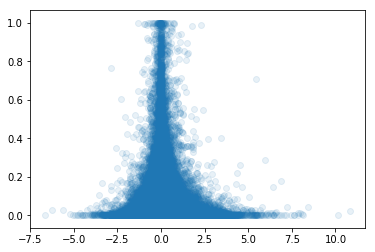

In [183]:
fig = plt.figure()
mask = top_k_div_norm_sc > 0
plt.scatter(loss_sc[mask] - loss_mi[mask], collapse_diff_val_mi[mask], alpha = 0.1)


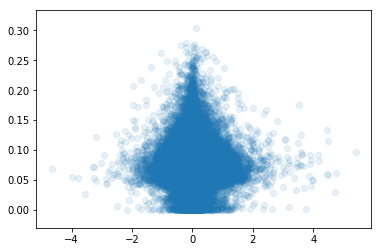

In [15]:
fig = plt.figure()
plt.scatter(loss_sc - loss_mc, pred_div_sq_weight_mc, alpha=0.1)

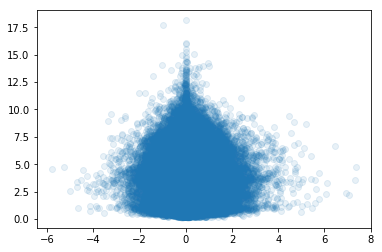

In [50]:
fig = plt.figure()
plt.scatter(loss_sc - loss_mc, reconstruction_err_sc*collapse_diff_mc, alpha=0.1)

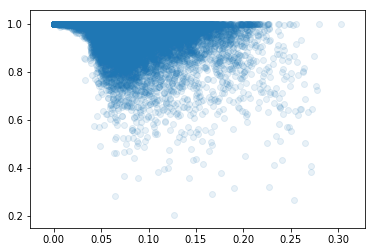

In [8]:
plt.scatter(pred_div_sq_weight_mc, collapse_diff_mc, alpha = 0.1)


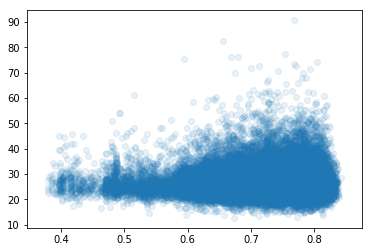

In [105]:
plt.scatter(top_k_div_norm_sc, facet_norm_sc, alpha = 0.1)

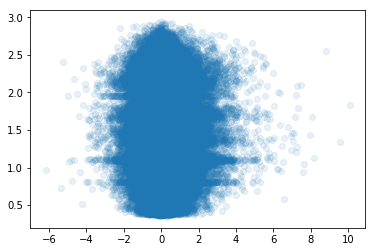

In [10]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_min_1, alpha=0.1)

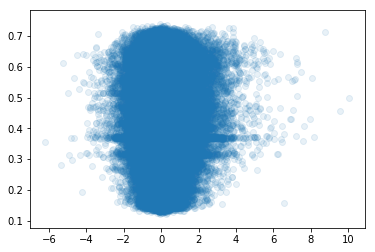

In [12]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_min_norm_1, alpha=0.1)

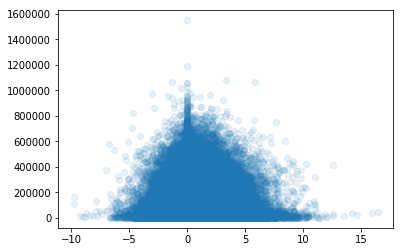

In [44]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_prod_1, alpha=0.1)

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


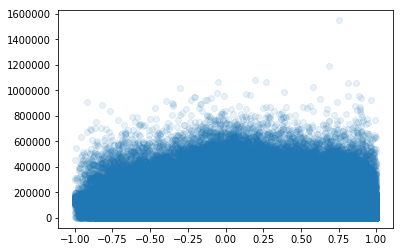

In [59]:
fig = plt.figure()
plt.scatter((loss_1 - loss_2)/np.maximum(loss_2,loss_1), eig_vals_prod_1, alpha=0.1)

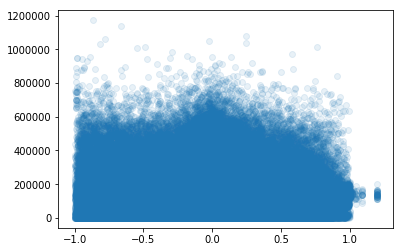

In [64]:
fig = plt.figure()
plt.scatter((loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), eig_vals_prod_1, alpha=0.1)

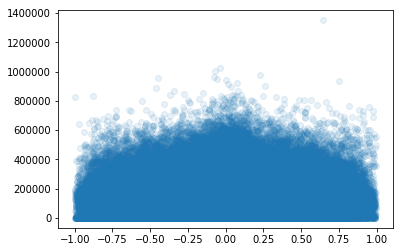

In [69]:
fig = plt.figure()
plt.scatter((loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), eig_vals_prod_1, alpha=0.1)

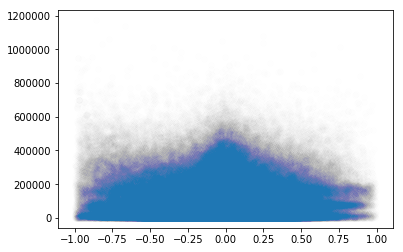

In [82]:
fig = plt.figure()
plt.scatter((loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), eig_vals_prod_1, alpha=0.005)

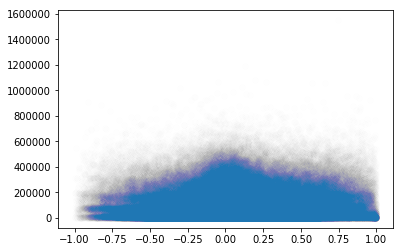

In [85]:
fig = plt.figure()
plt.scatter((loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), eig_vals_prod_1, alpha=0.005)

(array([ 2.27446247e-05,  7.02055715e-06,  5.27876412e-06,  3.50780101e-06,
         1.29038651e-06,  1.95761395e-06,  2.18559767e-06,  1.67846921e-06,
         1.57606522e-06,  1.50778020e-06,  1.43404761e-06,  1.29920387e-06,
         1.32304906e-06,  1.16140087e-06,  1.09432271e-06,  9.32366031e-07,
         9.13262970e-07,  8.85686953e-07,  7.49693612e-07,  6.52728105e-07,
         6.85129299e-07,  5.32770532e-07,  5.18281576e-07,  4.10520005e-07,
         4.32034210e-07,  3.12683474e-07,  3.04052848e-07,  2.79253681e-07,
         2.96486015e-07,  2.46508260e-07,  1.58726557e-07,  1.91965584e-07,
         1.46954375e-07,  1.44954165e-07,  1.28638733e-07,  8.13591094e-08,
         7.13152488e-08,  7.90236688e-08,  4.54648930e-08,  4.34079773e-08,
         6.84862881e-08,  2.37238316e-08,  3.30808207e-08,  3.44766613e-08,
         1.57041307e-08,  1.56727007e-08,  2.34329860e-09,  1.27957845e-08,
         8.10280734e-09,  1.29929685e-08,  7.18905062e-09,  3.25141452e-09,
         7.4

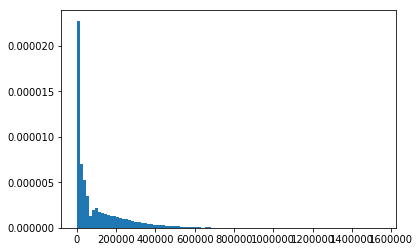

In [91]:
fig = plt.figure()
plt.hist(eig_vals_prod_1, bins = 100, weights=(loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), density=True)
#np.histogram

(array([8.6800e+02, 1.1737e+04, 1.2205e+04, 3.5588e+04, 9.9085e+04,
        5.2278e+04, 4.6092e+04, 4.1350e+04, 3.2818e+04, 2.7512e+04,
        2.8866e+04, 2.4401e+04, 2.1217e+04, 2.2141e+04, 2.3339e+04,
        2.1299e+04, 2.1232e+04, 2.3425e+04, 2.5277e+04, 2.8935e+04,
        2.4420e+04, 2.7676e+04, 1.9284e+04, 1.4233e+04, 1.1888e+04,
        9.8980e+03, 7.8420e+03, 6.8370e+03, 6.1550e+03, 5.6190e+03,
        5.0640e+03, 4.8770e+03, 4.6260e+03, 4.0770e+03, 3.8160e+03,
        3.3410e+03, 2.8930e+03, 2.5590e+03, 2.3410e+03, 2.2070e+03,
        2.0550e+03, 1.6460e+03, 1.2500e+03, 1.0670e+03, 8.3100e+02,
        7.0800e+02, 5.8200e+02, 4.5400e+02, 3.7600e+02, 3.0000e+02,
        2.4400e+02, 2.2400e+02, 1.8000e+02, 1.3300e+02, 1.0600e+02,
        8.9000e+01, 8.0000e+01, 4.8000e+01, 4.2000e+01, 4.1000e+01,
        4.4000e+01, 1.9000e+01, 2.0000e+01, 1.8000e+01, 1.4000e+01,
        1.5000e+01, 1.2000e+01, 1.0000e+01, 1.3000e+01, 4.0000e+00,
        2.0000e+00, 5.0000e+00, 8.0000e+00, 4.00

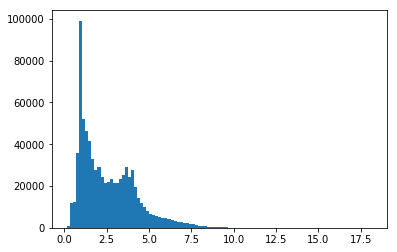

In [60]:
fig = plt.figure()
plt.hist(reconstruction_err_1, bins = 100)

(array([-1.31420453e+03, -8.31591434e+02, -6.83193781e+02, -8.26959717e+02,
        -7.74349609e+02, -5.53709953e+02, -4.62808229e+02, -3.58414475e+02,
        -3.84255728e+02, -3.15363467e+02, -2.02376588e+02, -2.13099914e+02,
        -1.37348479e+02, -3.99854366e+02, -1.57558533e+02, -1.10672614e+02,
        -1.59763767e+02, -1.44308655e+02, -9.71166844e+01, -1.20513557e+02,
        -9.40802630e+01, -1.07622540e+02, -7.59356246e+01, -6.90385509e+01,
        -7.75859017e+01, -4.20327941e+01, -9.65596634e+01, -3.74491300e+01,
        -4.50670319e+01, -4.44540893e+01, -3.86405494e+01, -1.93173138e+01,
        -4.59077956e+00, -3.66937722e+00, -4.63761146e+01, -5.08952988e+01,
        -1.92835716e+01, -1.25397927e+01, -3.94533328e+01, -3.54923364e+01,
        -5.32234527e+01, -2.83696451e+01, -3.79258220e+01, -2.20004630e+01,
        -2.66663953e+01, -3.87474078e+01, -2.82409962e+01, -3.48383669e+01,
        -3.65734245e+01, -6.84507639e+01, -6.13846450e+01, -3.78609931e+01,
        -2.0

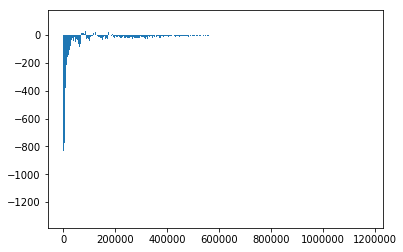

In [123]:
fig = plt.figure()
plt.hist(eig_vals_prod_1, bins = 1000, weights=(loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)))
#np.histogram

(array([ 5.95533756e+03,  3.77520118e+03,  2.48488094e+03,  1.96284770e+03,
         1.37506877e+03,  1.24850422e+03,  1.19650415e+03,  1.01850434e+03,
         1.08585849e+03,  8.97923903e+02,  8.41028168e+02,  8.37718855e+02,
         6.68251241e+02,  5.94973911e+02,  6.70986642e+02,  7.67016667e+02,
         6.08952689e+02,  6.72027797e+02,  5.94755301e+02,  5.02748521e+02,
         4.72533474e+02,  6.10604175e+02,  5.24162359e+02,  4.45019250e+02,
         4.24129736e+02,  4.17276181e+02,  3.99431937e+02,  3.58127349e+02,
         4.08550657e+02,  4.16086929e+02,  3.27410488e+02,  3.25520412e+02,
         3.04928458e+02,  2.59821981e+02,  2.82632763e+02,  2.64106949e+02,
         2.29076889e+02,  2.04421715e+02,  1.72903452e+02,  1.95424117e+02,
         1.40989036e+02,  1.85609843e+02,  1.78246197e+02,  1.62410501e+02,
         1.65117949e+02,  1.62715931e+02,  1.39834245e+02,  1.31510428e+02,
         1.28296207e+02,  8.64409279e+01,  1.23705008e+02,  1.11446583e+02,
         1.0

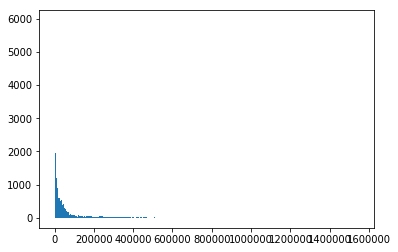

In [128]:
fig = plt.figure()
plt.hist(eig_vals_prod_1, bins = 1000, weights=(loss_1 - loss_2))
#np.histogram

(array([4060.86565143, 3172.67376694, 2325.24812289, 1806.63679759,
        1325.4913921 , 1198.71080775, 1064.72447659,  798.98085456,
         827.31897378,  795.33954598]),
 array([  10.91899586, 1009.82397127, 2008.72894669, 3007.6339221 ,
        4006.53889751, 5005.44387293, 6004.34884834, 7003.25382376,
        8002.15879917, 9001.06377459, 9999.96875   ]),
 <a list of 10 Patch objects>)

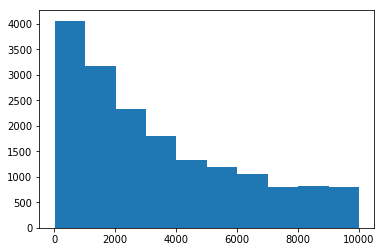

In [91]:
fig = plt.figure()
mask = eig_vals_prod_1 < 1e4
plt.hist(eig_vals_prod_1[mask], bins = 10, weights=(loss_1[mask] - loss_2[mask]))
#np.histogram

(array([1109.5169903 , 1546.53877269, 1063.93930229,  855.56346077,
         767.06535135,  443.07485686,  645.72161391,  609.69893837,
         429.38992991,  441.62533618]),
 array([5.47514963e+00, 1.00492617e+03, 2.00437719e+03, 3.00382821e+03,
        4.00327923e+03, 5.00273025e+03, 6.00218127e+03, 7.00163229e+03,
        8.00108331e+03, 9.00053433e+03, 9.99998535e+03]),
 <a list of 10 Patch objects>)

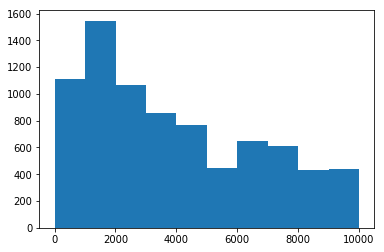

In [89]:
fig = plt.figure()
mask = eig_vals_prod_s < 1e4
plt.hist(eig_vals_prod_s[mask], bins = 10, weights=(loss_s[mask] - loss_m[mask]))
#np.histogram

(array([103700.,  94598.,  59564.,  42915.,  32769.,  25806.,  20736.,
         17594.,  15246.,  13087.]),
 array([  10.91899586, 1009.82397127, 2008.72894669, 3007.6339221 ,
        4006.53889751, 5005.44387293, 6004.34884834, 7003.25382376,
        8002.15879917, 9001.06377459, 9999.96875   ]),
 <a list of 10 Patch objects>)

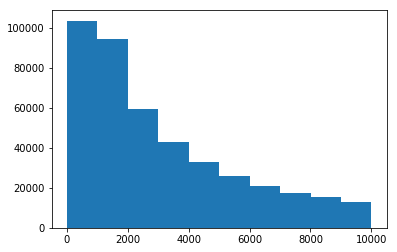

In [90]:
fig = plt.figure()
mask = eig_vals_prod_1 < 1e4
plt.hist(eig_vals_prod_1[mask], bins = 10)
#np.histogram

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


<BarContainer object of 1000 artists>

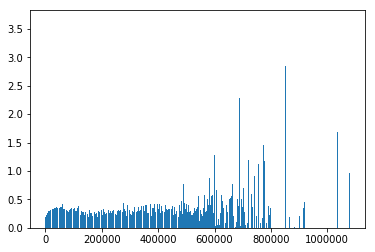

In [124]:
fig = plt.figure()
mask = loss_1 - loss_2 > 0
hist_1,edge = np.histogram(eig_vals_prod_1[mask], bins = 1000)
hist_2,edge = np.histogram(eig_vals_prod_1[mask], bins = 1000, weights=(loss_1[mask] - loss_2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 1000)

#np.histogram

<BarContainer object of 10 artists>

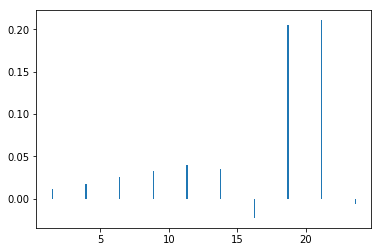

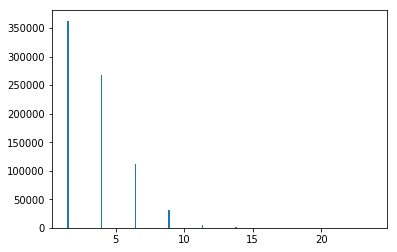

In [168]:
fig = plt.figure()
#mask = top_k_div_norm_sc < 0.5
#mask = (top_k_div_norm_sc > 0.7) & (top_entropy_sc > 1)
mask = top_k_div_norm_sc > 0
#hist_1,edge = np.histogram(eig_vals_min_norm_sc[mask], bins = 10)
#hist_2,edge = np.histogram(eig_vals_min_norm_sc[mask], bins = 10, weights=(loss_sc[mask] - loss_mc[mask]))
#hist_1,edge = np.histogram(eig_vals_min_norm_mc[mask] / top_k_div_norm_mc[mask], bins = 10)
#hist_2,edge = np.histogram(eig_vals_min_norm_mc[mask] / top_k_div_norm_mc[mask], bins = 10, weights=(loss_sc[mask] - loss_mc[mask]))
hist_1,edge = np.histogram(reconstruction_err_mc[mask] / top_k_div_norm_mc[mask] , bins = 10)
hist_2,edge = np.histogram(reconstruction_err_mc[mask] / top_k_div_norm_mc[mask] , bins = 10, weights=(loss_sc[mask] - loss_mc[mask]))
#hist_2,edge = np.histogram(reconstruction_err_sc[mask] , bins = 10, weights=top_k_div_norm_sc[mask])
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.1)
fig = plt.figure()
plt.bar(middle_point, hist_1, 0.1)

<BarContainer object of 10 artists>

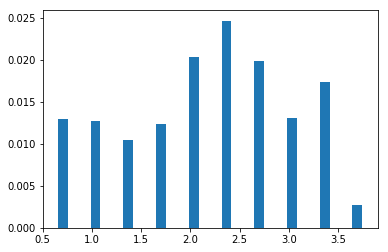

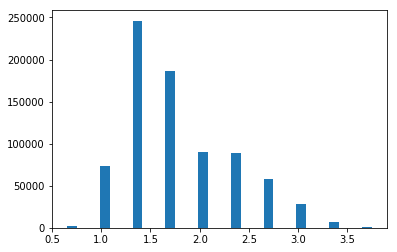

In [158]:
fig = plt.figure()
#mask = top_k_div_norm_slc < 0.5
#mask = (top_k_div_norm_slc > 0.7) & (top_entropy_slc > 1)
mask = top_k_div_norm_slc > 0
#hist_1,edge = np.histogram(eig_vals_min_norm_slc[mask], bins = 10)
#hist_2,edge = np.histogram(eig_vals_min_norm_slc[mask], bins = 10, weights=(loss_slc[mask] - loss_mlc[mask]))
#hist_1,edge = np.histogram(eig_vals_min_norm_slc[mask] / top_k_div_norm_slc[mask], bins = 10)
#hist_2,edge = np.histogram(eig_vals_min_norm_slc[mask] / top_k_div_norm_slc[mask], bins = 10, weights=(loss_slc[mask] - loss_mlc[mask]))
hist_1,edge = np.histogram(eig_vals_min_slc[mask] / top_k_div_norm_slc[mask], bins = 10)
hist_2,edge = np.histogram(eig_vals_min_slc[mask] / top_k_div_norm_slc[mask], bins = 10, weights=(loss_slc[mask] - loss_mlc[mask]))
#hist_1,edge = np.histogram(reconstruction_norm_err_slc[mask] / top_k_div_norm_slc[mask] , bins = 10)
#hist_2,edge = np.histogram(reconstruction_norm_err_slc[mask] / top_k_div_norm_slc[mask] , bins = 10, weights=(loss_slc[mask] - loss_mlc[mask]))
#hist_2,edge = np.histogram(reconstruction_err_slc[mask] , bins = 10, weights=top_k_div_norm_slc[mask])
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.1)
fig = plt.figure()
plt.bar(middle_point, hist_1, 0.1)

<BarContainer object of 10 artists>

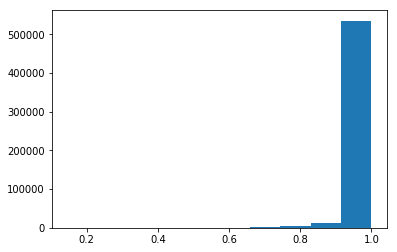

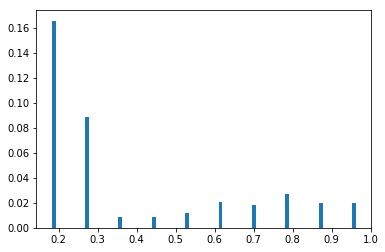

In [63]:
#plt.scatter(loss_sc - loss_mc, facet_norm_sc, alpha = 0.1)
#plt.scatter(loss_sc - loss_mc, collapse_diff_mc, alpha = 0.1)
#mask = loss_sc - loss_mc > 0
#mask = loss_sc > 0
mask = top_k_div_norm_sc > 0.7

fig = plt.figure()
plt.hist(collapse_diff_mc[mask], bins = 10)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mc[mask], bins = 10)
hist_2,edge = np.histogram(collapse_diff_mc[mask], bins = 10, weights=(loss_sc[mask] - loss_mc[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

#np.histogram

<BarContainer object of 10 artists>

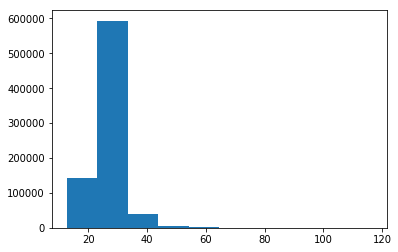

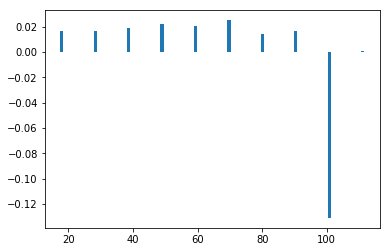

In [165]:
mask = top_k_div_norm_sc > 0

fig = plt.figure()
plt.hist(facet_norm_sc[mask], bins = 10)

fig = plt.figure()
hist_1,edge = np.histogram(facet_norm_sc[mask], bins = 10)
hist_2,edge = np.histogram(facet_norm_sc[mask], bins = 10, weights=(loss_sc[mask] - loss_mc[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 1)


<BarContainer object of 50 artists>

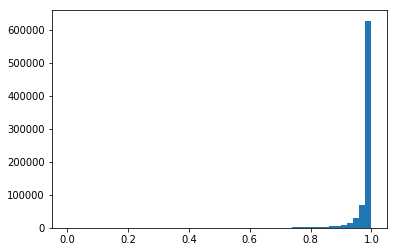

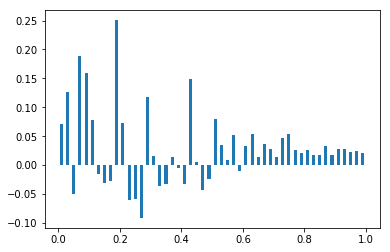

In [222]:
mask = top_k_div_norm_sc > 0

fig = plt.figure()
plt.hist(collapse_diff_mi2[mask], bins = 50)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mi2[mask], bins = 50)
hist_2,edge = np.histogram(collapse_diff_mi2[mask], bins = 50, weights=(loss_sc[mask] - loss_mi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

<BarContainer object of 10 artists>

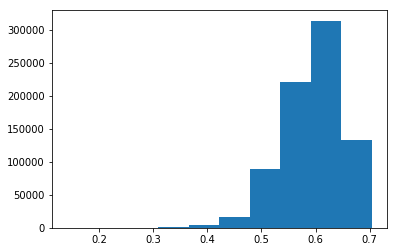

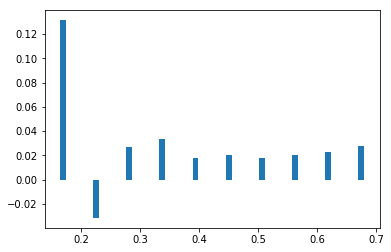

In [205]:
mask = top_k_div_norm_sc > 0

fig = plt.figure()
plt.hist(top_four_dist_si[mask], bins = 10)

fig = plt.figure()
hist_1,edge = np.histogram(top_four_dist_si[mask], bins = 10)
hist_2,edge = np.histogram(top_four_dist_si[mask], bins = 10, weights=(loss_sc[mask] - loss_mi[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

<BarContainer object of 30 artists>

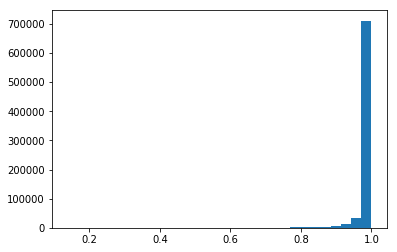

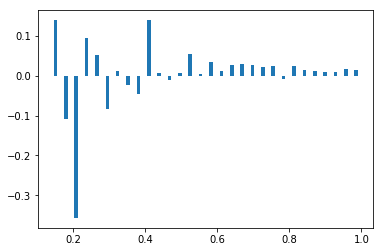

In [74]:
#mask = top_k_div_norm_slc > 0.7
mask = top_k_div_norm_slc > 0

fig = plt.figure()
plt.hist(collapse_diff_mlc[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mlc[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_mlc[mask], bins = 30, weights=(loss_slc[mask] - loss_mlc[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)


<BarContainer object of 30 artists>

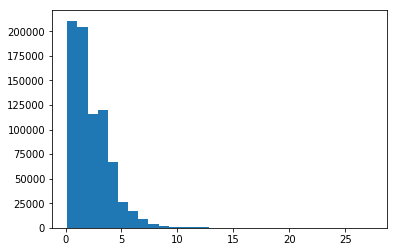

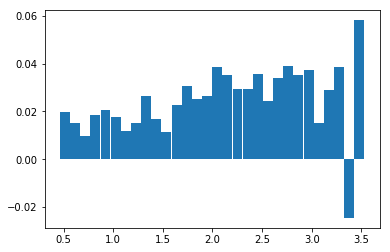

In [250]:
#plt.scatter(loss_sc - loss_mc, facet_norm_sc, alpha = 0.1)
#plt.scatter(loss_sc - loss_mc, collapse_diff_mc, alpha = 0.1)
fig = plt.figure()
plt.hist(reconstruction_err_si2, bins = 30)

fig = plt.figure()
#mask = loss_sc - loss_mc > 0
mask = loss_sc > 0
#hist_1,edge = np.histogram(reconstruction_norm_err_si2[mask]/top_k_div_norm_si2[mask], bins = 30)
#hist_2,edge = np.histogram(reconstruction_norm_err_si2[mask]/top_k_div_norm_si2[mask], bins = 30, weights=(loss_si2[mask] - loss_mi2[mask]))
hist_1,edge = np.histogram(eig_vals_min_si2[mask]/top_k_div_norm_si2[mask], bins = 30)
hist_2,edge = np.histogram(eig_vals_min_si2[mask]/top_k_div_norm_si2[mask], bins = 30, weights=(loss_si2[mask] - loss_mi2[mask]))

middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.1)

#np.histogram

<BarContainer object of 10 artists>

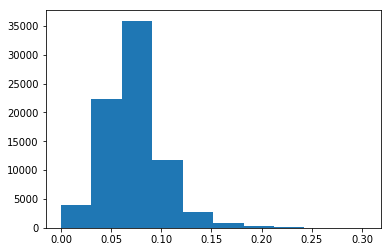

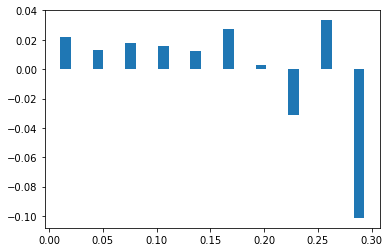

In [26]:
fig = plt.figure()
plt.hist(pred_div_sq_weight_mc, bins = 10)

fig = plt.figure()
#mask = loss_sc - loss_mc > 0
mask = loss_sc > 0
hist_1,edge = np.histogram(pred_div_sq_weight_mc[mask], bins = 10)
hist_2,edge = np.histogram(pred_div_sq_weight_mc[mask], bins = 10, weights=(loss_sc[mask] - loss_mc[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

In [35]:
mask = collapse_diff_mc > 0.85
print(np.sum(mask) / mask.size)
print(np.mean(loss_sc[mask] - loss_mc[mask]))
print(np.mean(loss_sc[~mask] - loss_mc[~mask]))

0.985374358974359
0.016654387115105234
0.018358970397229488


In [115]:
mask1 = top_k_div_norm_sc > 0
mask2 = collapse_diff_mpc < 0.95

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_mc[mask1] - loss_mpc[mask1]))
print(np.mean(loss_mc[mask1&mask2] - loss_mpc[mask1&mask2]))

0.12007564102564103
0.005589726668157658
0.006205514431820935


In [229]:
mask1 = top_k_div_norm_sc > 0
mask2 = collapse_diff_mi2 < 0.8

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_sc[mask1] - loss_mi2[mask1]))
print(np.mean(loss_sc[mask1&mask2] - loss_mi2[mask1&mask2]))

0.011094871794871794
0.022269044406445542
0.028771797946928017


In [190]:
mask1 = top_k_div_norm_sc > 0
mask2 = collapse_diff_val_mi >0.2

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_sc[mask1] - loss_mi[mask1]))
print(np.mean(loss_sc[mask1&mask2] - loss_mi[mask1&mask2]))

0.007121794871794871
0.022269044406445542
0.02464119113708337


In [195]:
mask1 = top_k_div_norm_sc > 0
mask2 = top_four_dist_mi < 0.2

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_sc[mask1] - loss_mi[mask1]))
print(np.mean(loss_sc[mask1&mask2] - loss_mi[mask1&mask2]))



3.205128205128205e-05
0.022269044406445542
0.07451801359653473


In [252]:
mask1 = top_k_div_norm_sc > 0
mask2 = collapse_diff_mc < 0.85

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_sc[mask1] - loss_mc[mask1]))
print(np.mean(loss_sc[mask1&mask2] - loss_mc[mask1&mask2]))

0.014625641025641026
0.01667931773828789
0.018358970397229488


In [118]:
mask1 = top_k_div_norm_slc > 0
mask2 = collapse_diff_mlc < 0.95

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_slc[mask1] - loss_mlc[mask1]))
print(np.mean(loss_slc[mask1&mask2] - loss_mlc[mask1&mask2]))

0.05304615384615385
0.014737624066933517
0.011554861893410213


In [117]:
mask1 = top_k_div_norm_sc > 0
mask2 = collapse_diff_mpc < 0.95

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_sc[mask1] - loss_sfc[mask1]))
print(np.mean(loss_sc[mask1&mask2] - loss_sfc[mask1&mask2]))

0.12007564102564103
0.057771658702765044
0.061496763094393704


In [80]:
fig = plt.figure()
mask = loss_1 > 0
#mask = loss_1 - loss_2 > 0
#mask = non_stop_idx_1
#mask = stop_idx_1
#hist_1,edge = np.histogram(eig_vals_prod_1[mask], bins = 1000, weights=(loss_1[mask] - loss_2[mask])/(1e-5+loss_1[mask]))
hist_1,edge = np.histogram(eig_vals_prod_1[mask], bins = 1000, weights=(loss_1[mask] - loss_2[mask])/(1e-10+loss_1[mask]))
hist_1 = hist_1/np.sum(hist_1)
mask = loss_s > 0
#mask = loss_s - loss_m > 0
#mask = non_stop_idx_s
#mask = stop_idx_s
#hist_2,edge = np.histogram(eig_vals_prod_s[mask], bins = 1000, weights=(loss_s[mask] - loss_m[mask])/(1e-5+loss_s[mask]))
hist_2,edge = np.histogram(eig_vals_prod_s[mask], bins = 1000, weights=(loss_s[mask] - loss_m[mask])/(1e-10+loss_s[mask]))
hist_2 = hist_2/np.sum(hist_2)
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_1, 1000)
plt.xlim(0, 5e4)
plt.ylim(-0.01, 0.15)
fig = plt.figure()
plt.bar(middle_point, hist_2, 1000)
plt.xlim(0, 5e4)
plt.ylim(-0.01, 0.15)
#fig = plt.figure()
#plt.bar(middle_point, hist_2 / (1e-5+hist_1), 1000)
#plt.xlim(0, 2e5)
#plt.ylim(-1, 5)


NameError: name 'loss_1' is not defined

<Figure size 432x288 with 0 Axes>

<BarContainer object of 50 artists>

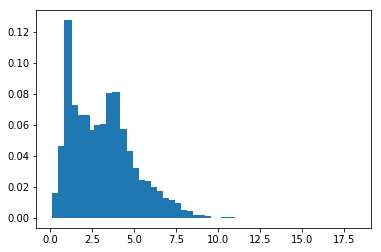

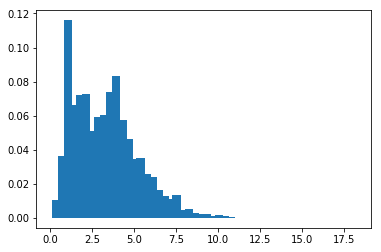

In [61]:
fig = plt.figure()
#mask = loss_1 - loss_2 > 0
mask = loss_1 > 0
#mask = non_stop_idx_1
#hist_1,edge = np.histogram(reconstruction_err_1[mask], bins = 50, weights=(loss_1[mask] - loss_2[mask])/(1e-5+loss_1[mask]))
hist_1,edge = np.histogram(reconstruction_err_1[mask], bins = 50, weights=(loss_1[mask] - loss_2[mask]))
hist_1 = hist_1/np.sum(hist_1)
#mask = loss_s - loss_m > 0
mask = loss_s > 0
#mask = non_stop_idx_s
#hist_2,edge = np.histogram(reconstruction_err_s[mask], bins = 50, weights=(loss_s[mask] - loss_m[mask])/(1e-5+loss_s[mask]))
hist_2,edge = np.histogram(reconstruction_err_s[mask], bins = 50, weights=(loss_s[mask] - loss_m[mask]))
hist_2 = hist_2/np.sum(hist_2)
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_1, 0.5)
#plt.xlim(0, 5e4)
#plt.ylim(-0.01, 0.15)
fig = plt.figure()
plt.bar(middle_point, hist_2, 0.5)
#plt.xlim(0, 5e4)
#plt.ylim(-0.01, 0.15)
#fig = plt.figure()
#plt.bar(middle_point, hist_2 / (1e-5+hist_1), 1000)
#plt.xlim(0, 2e5)
#plt.ylim(-1, 5)


<BarContainer object of 50 artists>

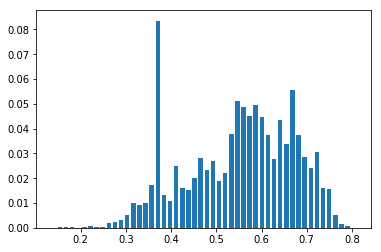

In [44]:
fig = plt.figure()
mask = loss_s > 0
#mask = loss_s5 - loss_m5 > 0
hist_2,edge = np.histogram(eig_vals_min_norm_s[mask], bins = 50, weights=(loss_s[mask] - loss_m[mask])/(1e-5+loss_s[mask]))
hist_2 = hist_2/np.sum(hist_2)
middle_point = (edge[:-1] + edge[1:])/2
#plt.xlim(0, 5e4)
#plt.ylim(-0.01, 0.15)
plt.bar(middle_point, hist_2, 0.01)
#plt.xlim(0, 5e4)
#plt.ylim(-0.01, 0.15)
#fig = plt.figure()
#plt.bar(middle_point, hist_2 / (1e-5+hist_1), 1000)
#plt.xlim(0, 2e5)
#plt.ylim(-1, 5)


<BarContainer object of 30 artists>

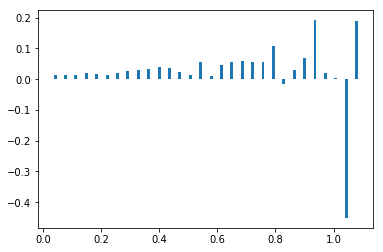

In [74]:
fig = plt.figure()
#mask = loss_s - loss_m > 0
mask = loss_s > 0
hist_1,edge = np.histogram(reconstruction_norm_err_s[mask], bins = 30)
hist_2,edge = np.histogram(reconstruction_norm_err_s[mask], bins = 30, weights=(loss_s[mask] - loss_m[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


<BarContainer object of 1000 artists>

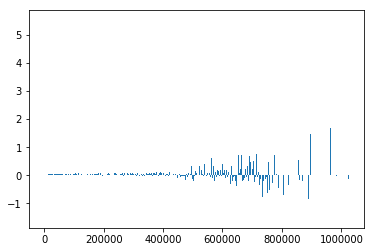

In [81]:
fig = plt.figure()
#mask = loss_s - loss_m > 0
mask = loss_s > 0
hist_1,edge = np.histogram(eig_vals_prod_m[mask], bins = 1000)
hist_2,edge = np.histogram(eig_vals_prod_m[mask], bins = 1000, weights=(loss_s[mask] - loss_m[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 1000)

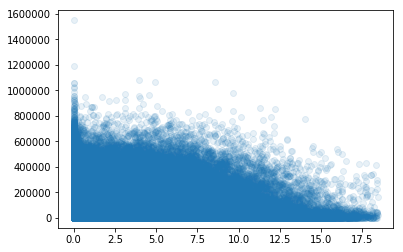

In [53]:
fig = plt.figure()
plt.scatter(loss_1, eig_vals_prod_1, alpha=0.1)

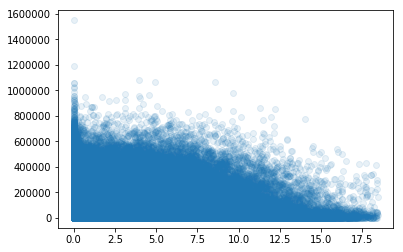

In [53]:
fig = plt.figure()
plt.scatter(loss_1, eig_vals_prod_1, alpha=0.1)

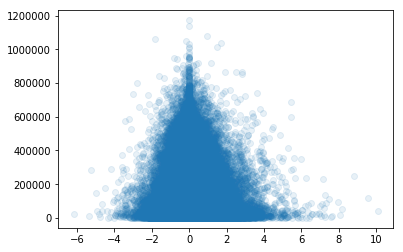

In [17]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_prod_1, alpha=0.1)

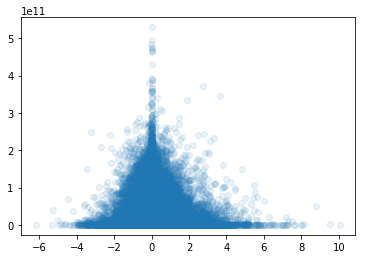

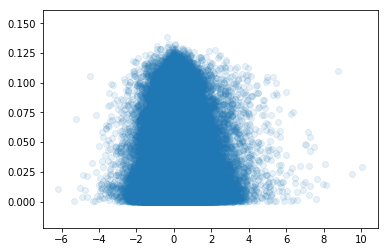

In [11]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_prod_1, alpha=0.1)
fig = plt.figure()
plt.scatter(loss_1 - loss_2, eig_vals_prod_norm_1, alpha=0.1)

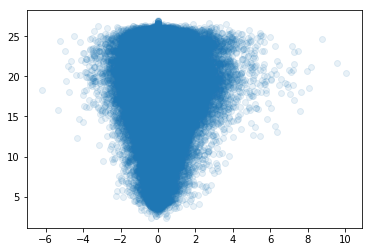

In [22]:
plt.scatter(loss_1 - loss_2, np.log(eig_vals_prod_1), alpha=0.1)

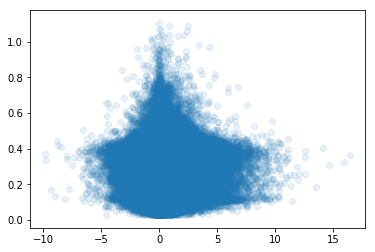

In [46]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, reconstruction_norm_err_1, alpha=0.1)


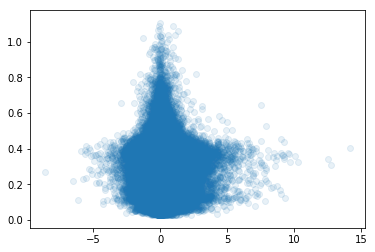

In [52]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, reconstruction_norm_err_1, alpha=0.1)


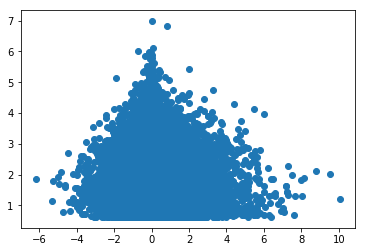

In [60]:
fig = plt.figure()
#plt.scatter(loss_1 - loss_2, np.minimum(reconstruction_err_1,target_norm_1*target_norm_1))
reconstruction_err_1_norm = reconstruction_err_1/np.mean(reconstruction_err_1)
target_norm_1_sq = target_norm_1 * target_norm_1
target_norm_1_norm = target_norm_1_sq/np.mean(target_norm_1_sq)
plt.scatter(loss_1 - loss_2, np.maximum(reconstruction_err_1_norm,target_norm_1_norm))

#plt.scatter(loss_1 - loss_2, reconstruction_err_1*target_norm_1)

In [15]:
def compute_percentile(target_norm_1):
    loss_diff = loss_1 - loss_2
    #print(np.mean(loss_diff))
    improve_mask = loss_diff > 0
    #plt.scatter(loss_diff[improve_mask], reconstruction_err_1[improve_mask])
    loss_pos = loss_diff[improve_mask]
    target_norm_pos = target_norm_1[improve_mask]
    #reconstruction_err_pos = reconstruction_err_1[improve_mask]
    target_norm_pos = target_norm_pos / np.mean(target_norm_pos)

    print(np.percentile(target_norm_pos*loss_pos,[70,80,90]))

compute_percentile(target_norm_1)
compute_percentile(reconstruction_err_1)
compute_percentile(reconstruction_err_1*target_norm_1)
compute_percentile(np.maximum(reconstruction_norm_err_1,target_norm_1))
compute_percentile(eig_vals_prod_1)

[0.28565069 0.41680478 0.67279741]
[0.24762778 0.41134138 0.7736714 ]
[0.22786553 0.39519525 0.78614467]
[0.28565069 0.41680478 0.67279741]
[0.00975789 0.03314929 0.163165  ]


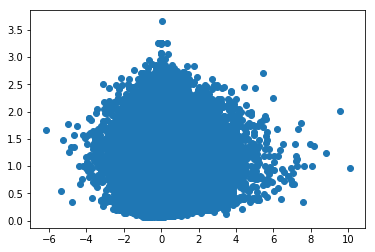

In [62]:
plt.scatter(loss_1 - loss_2, np.minimum(reconstruction_err_1_norm,target_norm_1_norm))

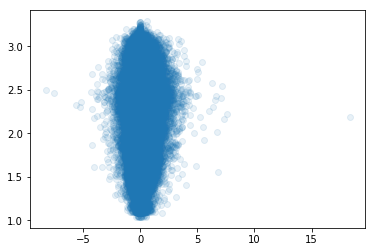

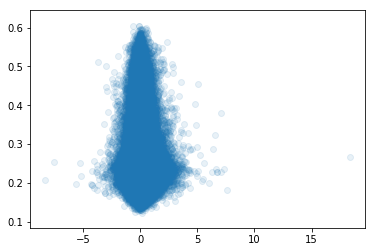

In [12]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, top_k_div_1, alpha=0.1)
fig = plt.figure()
plt.scatter(loss_1 - loss_2, pred_div_2, alpha=0.1)

In [13]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, pred_div_sq_weight_2, alpha=0.1)
plt.xlim(-6, 6)

NameError: name 'loss_1' is not defined

<Figure size 432x288 with 0 Axes>

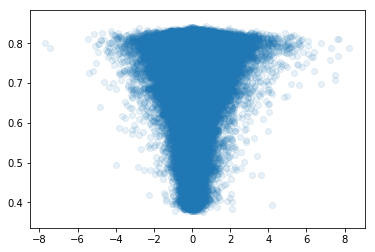

In [20]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, top_k_div_norm_1, alpha=0.1)
#fig = plt.figure()
#plt.scatter(loss_1 - loss_2, target_norm_1)

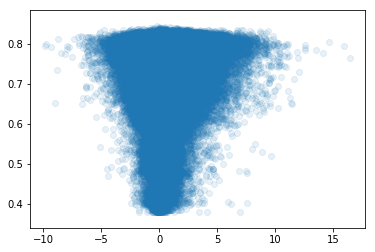

In [45]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, top_k_div_norm_1, alpha=0.1)


/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


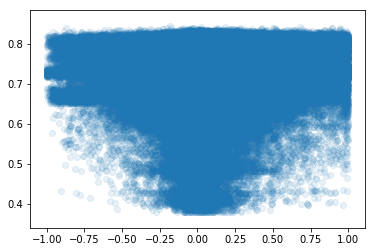

In [60]:
fig = plt.figure()
plt.scatter( (loss_1 - loss_2)/np.maximum(loss_2,loss_1), top_k_div_norm_1, alpha=0.1)


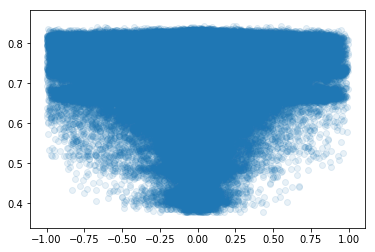

In [66]:
fig = plt.figure()
plt.scatter( (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), top_k_div_norm_1, alpha=0.1)


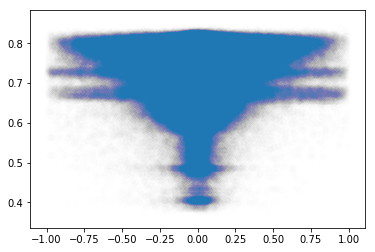

In [73]:
fig = plt.figure()
plt.scatter( (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), top_k_div_norm_1, alpha=0.005)


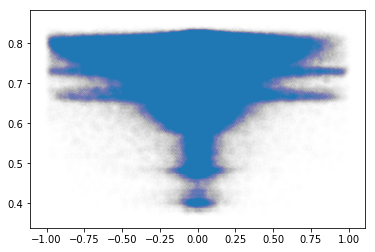

In [83]:
fig = plt.figure()
plt.scatter( (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), top_k_div_norm_1, alpha=0.005)


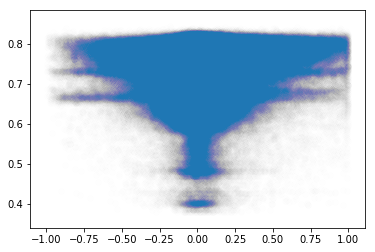

In [86]:
fig = plt.figure()
plt.scatter( (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), top_k_div_norm_1, alpha=0.005)


(array([2.73574431e-02, 4.12908836e-02, 1.09660401e-02, 2.55717174e-02,
        5.79773773e-02, 6.35041237e-02, 5.22003245e-02, 7.35431494e-02,
        3.79743189e-02, 5.38250320e-02, 9.55382771e-02, 1.06443504e-01,
        1.07090550e-01, 8.18121676e-03, 5.91801338e-02, 4.18367722e-02,
        5.08047791e-02, 4.83664406e-02, 1.05321752e-01, 1.19724290e-01,
        8.44825799e-02, 9.74968914e-02, 2.87700414e-01, 1.13754224e-01,
        1.09288441e-01, 1.32481156e-01, 2.75049072e-01, 1.17921995e-01,
        1.45407047e-01, 1.68589926e-01, 1.57601519e-01, 1.17459107e-01,
        1.92994519e-01, 1.49680027e-01, 1.67509677e-01, 1.69996897e-01,
        8.58619188e-02, 1.48545025e-01, 2.53779149e-01, 2.05955468e-01,
        2.79547888e-01, 3.07570289e-01, 2.66890510e-01, 2.24025050e-01,
        3.29974262e-01, 3.39377367e-01, 3.68924829e-01, 4.43684731e-01,
        4.82744422e-01, 5.45047546e-01, 3.97173038e-01, 7.55073111e-01,
        7.57532586e-01, 8.02196906e-01, 1.07644604e+00, 1.120961

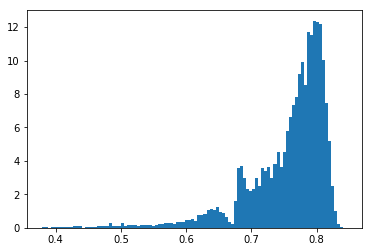

In [92]:
fig = plt.figure()
plt.hist(top_k_div_norm_1, bins = 100, weights=(loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), density=True)



(array([-7.39095559e-03,  1.65314227e-02,  1.11377832e-02,  3.35870662e-02,
         4.80423210e-02,  7.22174769e-02,  1.33817417e-01,  3.94277967e-02,
         6.43585588e-02,  6.89636103e-02,  3.87397164e-02,  7.95054081e-02,
         5.92983948e-02,  2.14870607e-02,  4.44841962e-03,  1.85189558e-02,
        -2.16938578e-02,  4.05058502e-02,  1.92355277e-02,  7.01300099e-02,
         4.77082288e-02,  1.56047572e-01,  1.48045251e-01,  6.72698494e-02,
         5.74751345e-02,  1.13180270e-01,  1.13657486e-01, -2.38558483e-02,
         7.92588853e-02,  1.02275966e-01,  1.49271584e-01, -5.27184808e-02,
         2.02117397e-01, -4.17746899e-02,  2.87885797e-01,  8.39963733e-04,
         8.24927272e-02,  3.02538014e-02,  2.16208933e-01,  1.24678320e-01,
         1.73292073e-01,  1.18769905e-01,  1.17296255e-01,  7.25493606e-02,
         2.20081825e-01,  4.69606605e-01,  5.10661935e-01,  6.21795249e-01,
         6.72428300e-01,  7.85647014e-01,  1.10342358e+00,  8.88584001e-01,
         1.4

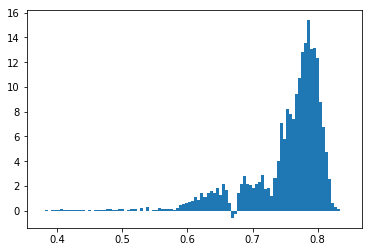

In [96]:
fig = plt.figure()
plt.hist(top_k_div_norm_1, bins = 100, weights=(loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), density=True)



(array([ 2.83683587e+00,  4.11651971e+00,  1.51312888e-01,  1.41029776e+00,
         2.60220619e+00,  4.35089864e+00,  2.95694028e+00,  3.20311654e+00,
         1.50163451e+00,  2.15653935e+00,  8.17443280e-01, -1.25492749e+00,
         8.60016966e+00, -9.19946808e-01,  4.65146583e+00,  8.36241627e-01,
         1.39910755e+00,  2.39586242e+00,  9.84938959e+00,  8.19370780e+00,
         1.97651835e+00,  3.61790455e+00,  1.80210476e+01, -5.57122094e+00,
         3.64659203e+00, -1.01120775e+00,  2.20662331e+01,  3.47785008e+00,
         7.70829954e+00,  5.23118446e+00, -6.50913891e-01,  5.72676787e+00,
         8.59377507e+00, -6.50605750e+00,  3.84509360e+00, -7.40035902e+00,
        -2.83358655e+01, -1.69918550e+01, -1.20870770e+01,  2.28139823e-01,
         1.50263361e+01,  1.38448368e+01, -2.12724924e+01, -1.03354021e+01,
        -1.81053302e+01, -3.96498685e+00, -2.42133656e+01, -2.24928794e+00,
        -6.57820361e-01, -7.92083145e+00, -7.23694013e+01, -2.80614257e+01,
        -3.4

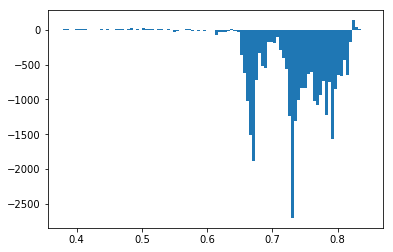

In [54]:
fig = plt.figure()
plt.hist(top_k_div_norm_1, bins = 100, weights=(loss_1 - loss_2)/(1e-5+loss_1))



(array([ 1.63021185e-01, -2.10799872e+00, -1.87936456e+00, -4.11513728e+00,
        -7.23516035e+00, -9.73337187e+00, -1.60401169e+01, -6.57961383e+00,
        -9.27200194e+00, -7.86518832e+00, -8.77474658e+00, -1.35464288e+01,
        -1.27259203e+01, -3.07422124e+00, -6.10346249e+00, -5.47806937e+00,
        -9.80951540e-01, -8.78047963e+00, -7.87372944e+00, -1.47930174e+01,
        -1.33594527e+01, -2.82088780e+01, -3.34712754e+01, -2.76749931e+01,
        -2.14401114e+01, -2.73194969e+01, -3.17925771e+01, -1.27363065e+01,
        -3.40163878e+01, -9.30113637e+01, -7.07095317e+01, -2.83274248e+01,
        -6.24845689e+01, -9.58024266e+01, -9.49086663e+01, -2.28133897e+01,
        -4.71976201e+01, -3.79932035e+01, -8.45505750e+01, -7.28942695e+01,
        -5.75968143e+01, -2.33790880e+02, -4.69103817e+01, -7.11423149e+01,
        -1.19668393e+02, -1.23815161e+02, -1.40075121e+02, -2.76929423e+02,
        -2.93751296e+02, -2.18403318e+02, -5.15871431e+02, -3.80811278e+02,
        -6.8

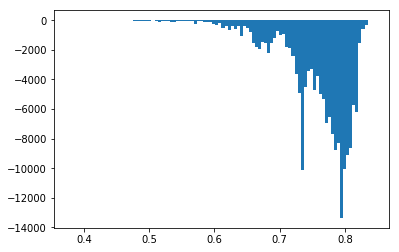

In [55]:
fig = plt.figure()
plt.hist(top_k_div_norm_s, bins = 100, weights=(loss_s - loss_m)/(1e-5+loss_s))



(array([1.65784548e-02, 2.68612939e-02, 2.18248013e-02, 2.14050935e-02,
        1.15209768e-01, 1.45638578e-01, 7.97444662e-02, 5.16240491e-02,
        7.89050507e-02, 4.49087257e-02, 6.58941115e-02, 5.24634646e-02,
        4.97353644e-02, 3.00091017e-02, 3.14780787e-02, 4.11313562e-02,
        4.13412101e-02, 5.39324416e-02, 6.88320655e-02, 7.05108964e-02,
        1.49835655e-01, 1.63686009e-01, 3.75848260e-01, 2.03348389e-01,
        1.29269977e-01, 1.40602085e-01, 1.46897701e-01, 1.35565592e-01,
        1.28850269e-01, 1.22974361e-01, 1.22344799e-01, 1.50675070e-01,
        1.62217032e-01, 1.39342962e-01, 1.55291855e-01, 1.41441501e-01,
        1.57600248e-01, 1.54452440e-01, 1.74598410e-01, 1.70191479e-01,
        1.65994402e-01, 1.57810101e-01, 2.13211520e-01, 3.21286257e-01,
        4.13202247e-01, 5.27572600e-01, 6.27882744e-01, 7.59251259e-01,
        9.98904366e-01, 1.11705209e+00, 1.30948808e+00, 1.45239855e+00,
        1.63560097e+00, 1.82656798e+00, 2.04061892e+00, 2.183319

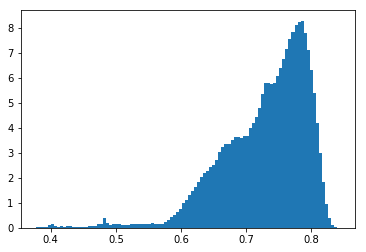

In [102]:
fig = plt.figure()
plt.hist(top_k_div_norm_1, bins = 100, density=True)



(0.6, 0.9)

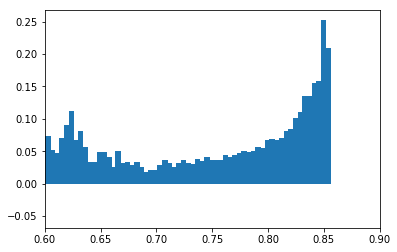

In [251]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_si2, bins = 100)
#hist_2,edge = np.histogram(top_k_div_norm_1, bins = 100, weights=(loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)))
hist_2,edge = np.histogram(top_k_div_norm_si2, bins = 100, weights=(loss_si2 - loss_sfc))
#print(hist_2)
#plt.hist(top_k_div_norm_1, bins = 100, weights=(loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1)), density=True)
#plt.hist(top_k_div_norm_1, bins = 100, weights=(loss_1 - loss_2))
#print(hist_2.shape , edge.shape)
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.6, 0.9)
#plt.bar(middle_point, hist_1, 0.005)
#plt.bar(middle_point, hist_2, 0.005)

(0.6, 0.9)

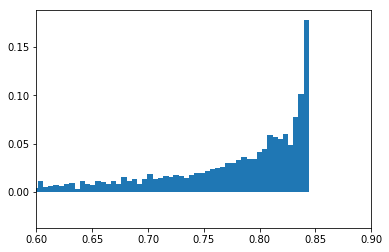

In [83]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_s, bins = 100)
hist_2,edge = np.histogram(top_k_div_norm_s, bins = 100, weights=(loss_s - loss_m))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.6, 0.9)

(0.6, 0.9)

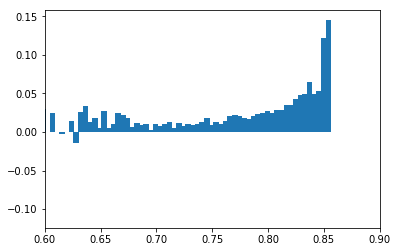

In [243]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_si2, bins = 100)
hist_2,edge = np.histogram(top_k_div_norm_si2, bins = 100, weights=(loss_si2 - loss_mi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.6, 0.9)

[26.6805073  26.69660052 26.66665608 26.52779938 26.57990749 26.49331542
 26.47768332 26.48311356 26.4925066  26.48918296]


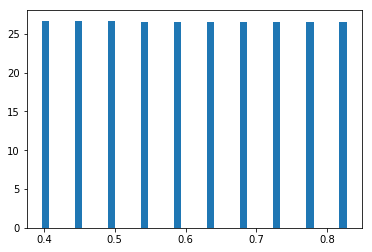

In [122]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_sc, bins = 10)
hist_2,edge = np.histogram(top_k_div_norm_sc, bins = 10, weights=facet_norm_sc)
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)
print(hist_2 / hist_1)

<BarContainer object of 10 artists>

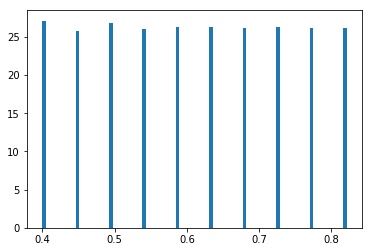

In [107]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_sc, bins = 10)
hist_2,edge = np.histogram(top_k_div_norm_sc, bins = 10, weights=facet_norm_sc)
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
#plt.xlim(0.6, 0.9)

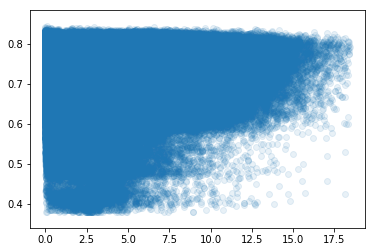

In [54]:
fig = plt.figure()
plt.scatter(loss_1, top_k_div_norm_1, alpha=0.1)

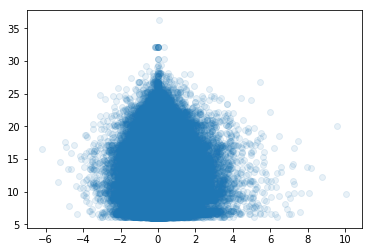

In [12]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, target_norm_1*target_norm_1, alpha=0.1)

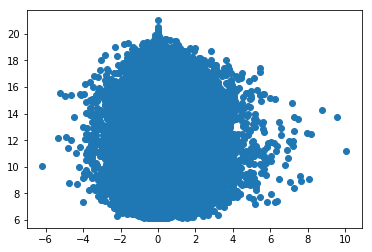

In [66]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, top_k_mag_1*top_k_mag_1)

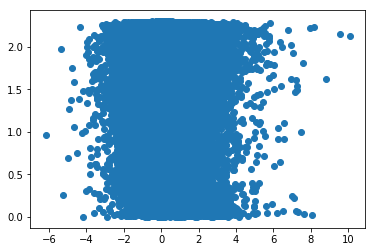

In [67]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, top_entropy_1)

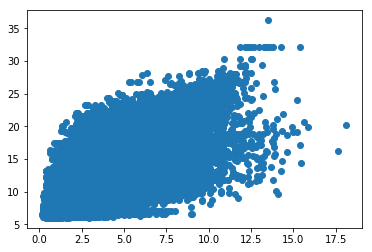

In [68]:
plt.scatter(reconstruction_err_1, target_norm_1*target_norm_1)

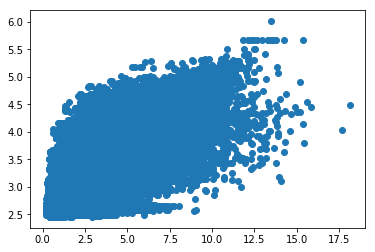

In [69]:
plt.scatter(reconstruction_err_1, target_norm_1)

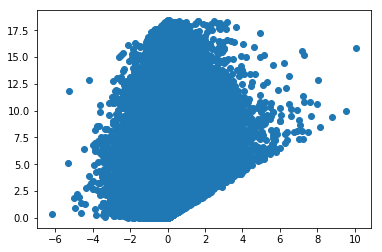

In [70]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, loss_1)

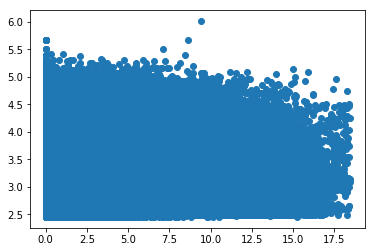

In [71]:
plt.scatter(loss_1, target_norm_1)

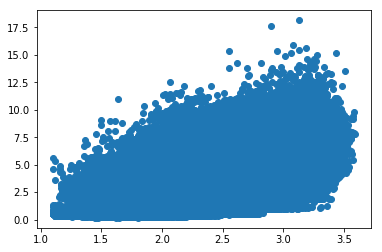

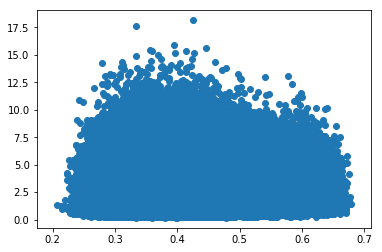

In [72]:
fig = plt.figure()
plt.scatter(top_k_div_1, reconstruction_err_1)

fig = plt.figure()
plt.scatter(pred_div_2, reconstruction_err_1)


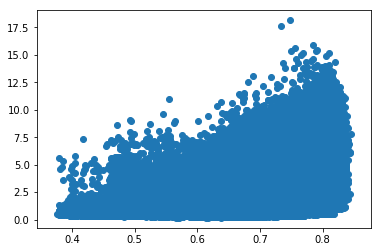

In [73]:
fig = plt.figure()
plt.scatter(top_k_div_norm_1, reconstruction_err_1)

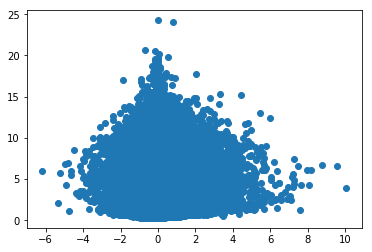

In [74]:
fig = plt.figure()
plt.scatter(loss_1 - loss_2, reconstruction_err_1/top_k_div_norm_1)

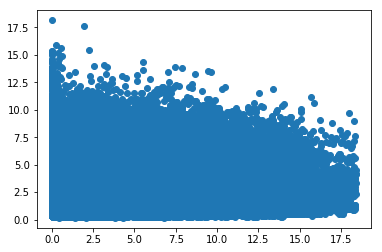

In [75]:
plt.scatter(loss_1, reconstruction_err_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


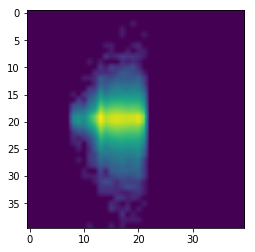

In [76]:
fig = plt.figure()
#x = loss_1[low_re_high_norm] - loss_2[low_re_high_norm]
#y = target_norm_1[low_re_high_norm] * target_norm_1[low_re_high_norm]
x = loss_1[high_re_low_norm] - loss_2[high_re_low_norm]
y = target_norm_1[high_re_low_norm] * target_norm_1[high_re_low_norm]

hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[-6, 6], [0, 30]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


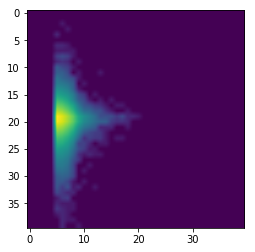

In [77]:
fig = plt.figure()
x = loss_1[high_re_low_norm] - loss_2[high_re_low_norm]
y = reconstruction_err_1[high_re_low_norm]
#x = loss_1[low_re_high_norm] - loss_2[low_re_high_norm]
#y = reconstruction_err_1[low_re_high_norm]

hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[-6, 6], [0, 30]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


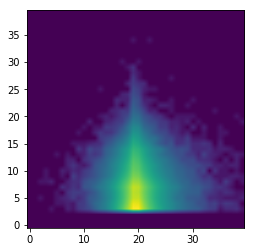

In [78]:
fig = plt.figure()
#x = loss_1[stop_idx] - loss_2[stop_idx]
#y = target_norm_1[stop_idx] * target_norm_1[stop_idx]
#x = loss_1
#y = target_norm_1* target_norm_1
x = np.maximum(reconstruction_err_1_norm,target_norm_1_norm)
y = loss_1 - loss_2

hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 8], [-6, 6]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


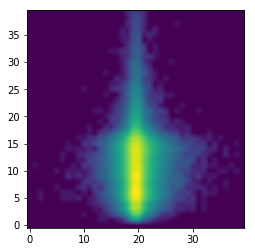

In [11]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = target_norm_1[non_stop_idx] * target_norm_1[non_stop_idx]
y = loss_1 - loss_2
x = reconstruction_norm_err_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 1], [-6, 6]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


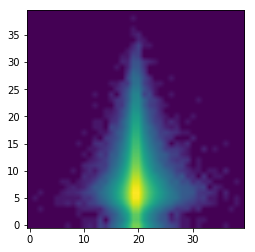

In [21]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = target_norm_1[non_stop_idx] * target_norm_1[non_stop_idx]
y = loss_1 - loss_2
x = pred_div_sq_weight_2
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 0.3], [-6, 6]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


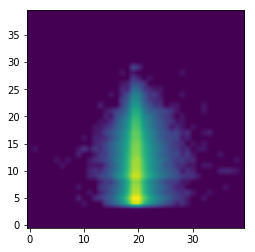

In [10]:
fig = plt.figure()
#x = loss_1[stop_idx] - loss_2[stop_idx]
#y = reconstruction_err_1[stop_idx]
y = loss_1 - loss_2
x = target_norm_1 * target_norm_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 35], [-8, 8]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


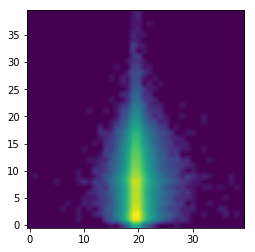

In [9]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
y = loss_1 - loss_2
x = reconstruction_err_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 15], [-8, 8]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 2. 3. 1.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 2. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


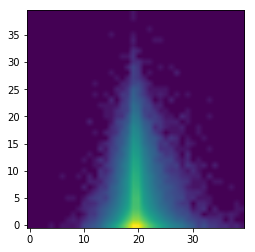

In [14]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
eig_vals_prod_1_norm = eig_vals_prod_1/np.mean(eig_vals_prod_1)
y = loss_1 - loss_2
x = eig_vals_prod_1_norm
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 30], [-8, 8]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


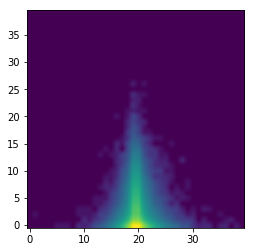

In [8]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
eig_vals_prod_1_norm = eig_vals_prod_1/np.mean(eig_vals_prod_1)
y = loss_1 - loss_2
x = eig_vals_prod_1_norm
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 50], [-8, 8]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[106. 184. 282. ... 208. 138.  71.]
 [ 24.  46.  88. ...  69.  45.  16.]
 [ 41. 102. 145. ... 229. 193.  81.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


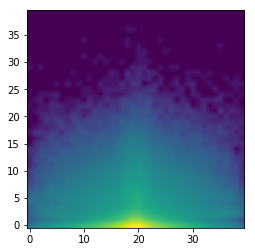

In [77]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
eig_vals_prod_1_norm = eig_vals_prod_1/np.mean(eig_vals_prod_1)
y = (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1))
x = eig_vals_prod_1_norm
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 30], [-1, 1]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[264. 396. 503. ... 194. 141.  64.]
 [103. 152. 215. ...  68.  43.  14.]
 [ 78. 186. 275. ... 195. 100.  36.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   1. ...   0.   0.   0.]]


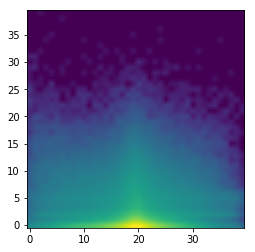

In [81]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
eig_vals_prod_1_norm = eig_vals_prod_1/np.mean(eig_vals_prod_1)
y = (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1))
x = eig_vals_prod_1_norm
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 30], [-1, 1]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[ 43. 100. 209. ... 630. 603. 919.]
 [ 20.  25.  66. ... 209. 184. 199.]
 [ 32.  97. 181. ... 197. 151.  97.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


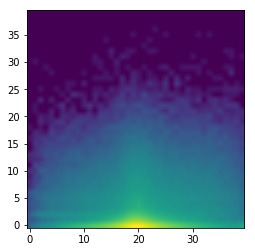

In [88]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
eig_vals_prod_1_norm = eig_vals_prod_1/np.mean(eig_vals_prod_1)
y = (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1))
x = eig_vals_prod_1_norm
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 30], [-1, 1]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


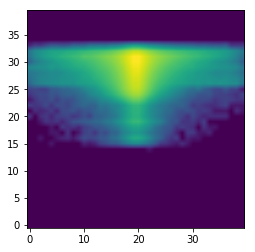

In [78]:
fig = plt.figure()
y = (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1))
x = top_k_div_norm_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 1], [-1, 1]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


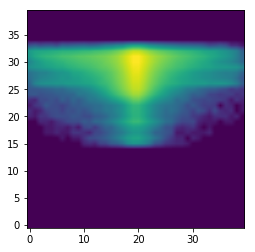

In [80]:
fig = plt.figure()
y = (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1))
x = top_k_div_norm_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 1], [-1, 1]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


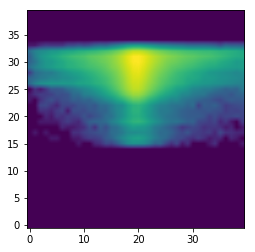

In [87]:
fig = plt.figure()
y = (loss_1 - loss_2)/(1e-5+np.maximum(loss_2,loss_1))
x = top_k_div_norm_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 1], [-1, 1]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


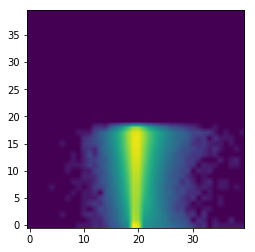

In [117]:
fig = plt.figure()
#x = loss_1[non_stop_idx] - loss_2[non_stop_idx]
#y = reconstruction_err_1[non_stop_idx]
y = loss_1 - loss_2
x = top_entropy_1 
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[0, 5], [-8, 8]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

#plt.contourf(xpos,ypos,hist)

print(hist)
plt.imshow(np.log(hist+1), interpolation='bilinear', origin='lower')
plt.show()

0.02279229529441943


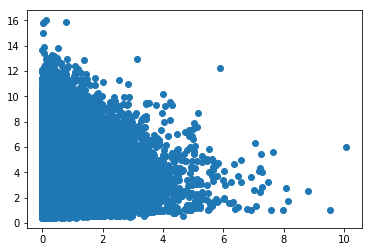

In [7]:
loss_diff = loss_1 - loss_2
print(np.mean(loss_diff))
improve_mask = loss_diff > 0
plt.scatter(loss_diff[improve_mask], reconstruction_err_2[improve_mask])

In [8]:
print(scipy.stats.pearsonr(loss_diff[improve_mask], reconstruction_err_2[improve_mask]))

(0.0038721330248372376, 0.006110676861337365)


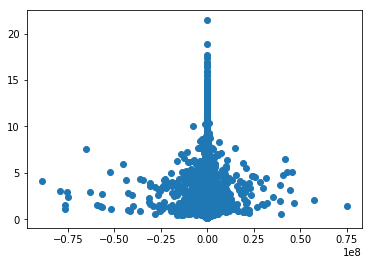

In [14]:
plt.scatter(np.exp(loss_1) - np.exp(loss_2), reconstruction_err_1)

<IPython.core.display.Javascript object>


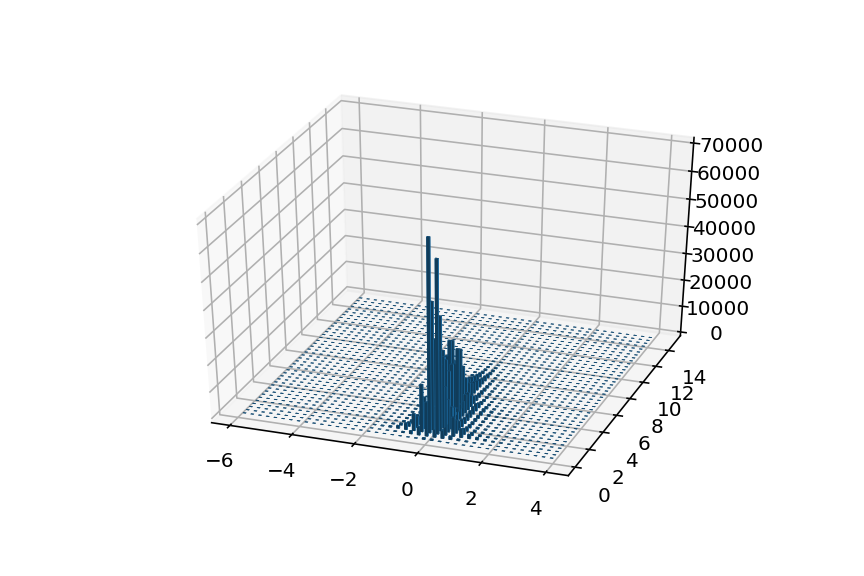

In [31]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = loss_1 - loss_2 
y = reconstruction_err_1
hist, xedges, yedges = np.histogram2d(x, y, bins=40, range=[[-6, 4], [0, 15]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.1 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [2]:
result_file_1 = "/mnt/nfs/scratch1/hschang/language_modeling/Multi-facet_softmax/gen_log/single_facet_top10_to_1_recon_err"
result_file_2 = "/mnt/nfs/scratch1/hschang/language_modeling/Multi-facet_softmax/gen_log/multi_facet_top10_to_1_recon_err"
#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err"

#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err_norm_emb"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err_norm_emb"



def load_result_file(result_file_name):
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            input_idx, loss, reconstruction_err= fields[:3]
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err)])
    input_idx_list, loss_list, reconstruction_err_list = zip(*results_list)
    label_idx_list = input_idx_list[1:]
    return label_idx_list, np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1])

label_idx_1, loss_1, reconstruction_err_1 = load_result_file(result_file_1)
label_idx_2, loss_2, reconstruction_err_2 = load_result_file(result_file_2)


#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err"
#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err"

result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err_not_norm_emb"
result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err_not_norm_emb"



def load_result_file(result_file_name):
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            input_idx, loss, reconstruction_err, top_k_div, pred_div = fields[:5]
            top_k_idx_list.append(fields[5:])
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(top_k_div), float(pred_div)])
    input_idx_list, loss_list, reconstruction_err_list, top_k_div_list, pred_div_list = zip(*results_list)
    label_idx_list = input_idx_list[1:]
    return label_idx_list, top_k_idx_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(pred_div_list[:-1])

label_idx_1, top_k_idx_1, loss_1, reconstruction_err_1, top_k_div_1, pred_div_1 = load_result_file(result_file_1)
label_idx_2, top_k_idx_2, loss_2, reconstruction_err_2, top_k_div_2, pred_div_2 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err"
#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err"

#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err_not_norm_emb_more"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err_not_norm_emb_more"

result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_not_norm_emb_more"
result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_not_norm_emb_more"



def load_result_file(result_file_name):
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            input_idx, loss, reconstruction_err, top_k_div, top_k_div_norm, pred_div, target_norm = fields[:7]
            top_k_idx_list.append(fields[7:])
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(target_norm)])
    input_idx_list, loss_list, reconstruction_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, target_norm_list = zip(*results_list)
    label_idx_list = input_idx_list[1:]
    return label_idx_list, top_k_idx_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1])

label_idx_1, top_k_idx_1, loss_1, reconstruction_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, target_norm_1 = load_result_file(result_file_1)
label_idx_2, top_k_idx_2, loss_2, reconstruction_err_2, top_k_div_2, top_k_div_norm_2, pred_div_2, target_norm_2 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err"
#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err"

#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err_not_norm_emb_more"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err_not_norm_emb_more"

result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_more"
result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_more"



def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 10
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, target_norm, top_k_mag, top_entropy = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(target_norm), float(top_k_mag), float(top_entropy)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, target_norm_list, top_k_mag_list, top_entropy_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list)

label_idx_1, top_k_idx_1, top_k_prob_list_1, loss_1, reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, target_norm_1, top_k_mag_1, top_entropy_1 = load_result_file(result_file_1)
label_idx_2, top_k_idx_2, top_k_prob_list_2, loss_2, reconstruction_err_2, reconstruction_norm_err_2, top_k_div_2, top_k_div_norm_2, pred_div_2, target_norm_2, top_k_mag_2, top_entropy_2 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))


#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err"
#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err"

#result_file_1 = "../gen_log/single_facet_top3_to_1_recon_err_not_norm_emb_more"
#result_file_2 = "../gen_log/multi_facet_top3_to_1_recon_err_not_norm_emb_more"

#result_file_1 = "../gen_log/single_facet_top10_to_1_recon_err_both_norm_emb_eigs_new"
#result_file_2 = "../gen_log/multi_facet_top10_to_1_recon_err_both_norm_emb_eigs_new"

result_file_1 = "../gen_log/single_facet_top5_to_1_recon_err_both_norm_emb_eigs"
result_file_2 = "../gen_log/multi_facet_top5_to_1_recon_err_both_norm_emb_eigs"



def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 12
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/2)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list)

label_idx_1, top_k_idx_1, top_k_prob_list_1, loss_1, reconstruction_err_1, reconstruction_norm_err_1, top_k_div_1, top_k_div_norm_1, pred_div_1, target_norm_1, top_k_mag_1, top_entropy_1, eig_vals_min_1, eig_vals_prod_1 = load_result_file(result_file_1)
label_idx_2, top_k_idx_2, top_k_prob_list_2, loss_2, reconstruction_err_2, reconstruction_norm_err_2, top_k_div_2, top_k_div_norm_2, pred_div_2, target_norm_2, top_k_mag_2, top_entropy_2, eig_vals_min_2, eig_vals_prod_2 = load_result_file(result_file_2)



#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_2)) #expect higher reconstruction_err imply lower loss difference, so negative correlation
#print(scipy.stats.pearsonr(loss_2 - loss_1, reconstruction_err_1))
